#### Elaborado por:
- Priscilla Jiménez Salgado
- Fabián Araya Ortega
- David Acuña López


# B. Lectura del Dataset

In [263]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Student_Performance.csv")
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Información general del dataset

El dataset que se trabaja corresponde al rendimiento académico de estudiantes. Se analizará la información general mediante estadísticas descriptivas, histogramas, boxplots para observar la distribución de los datos numéricos.

Para obtener primeramente la estructura general del dataset utilizamos df.info(), lo cual retorna un resumen con:
- Número de filas
- Lista de las columnas y el tipo de dato
- Los valores no nulos


In [264]:
# @title
# Ver información general del dataset
print(" Información del dataset:")
df.info()

 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Después de ver la estructura del dataset, usamos df.describe() para obtener un resumen de los números. Esta tabla nos ayuda a entender mejor los datos antes de graficarlos o entrenar un modelo.

- Count (conteo): muestra cuántos valores tiene cada columna. Si el número es menor que el total de filas, significa que hay datos faltantes que tal vez debamos rellenar o eliminar.

- Mean y std (promedio y variación): nos dicen cuál es el valor típico y qué tanto cambian los datos. Si la variación es muy grande, puede que necesitemos normalizar o revisar si hay valores raros.

- Min y Max (mínimo y máximo): permiten ver los límites. Si un valor máximo es demasiado alto comparado con el resto, puede ser un error o un outlier.

- Percentiles (25%, 50% o mediana, y 75%): muestran cómo se reparten los datos. Si la mediana es muy diferente al promedio, significa que los datos están sesgados.

*** En resumen: con esta información podemos decidir si el dataset está limpio o si necesita ajustes (tratar datos faltantes, normalizar valores, o revisar outliers). Es un paso clave para asegurarnos de que el análisis y los modelos que hagamos después sean confiables.


In [265]:
# @title
# Ver estadísticas descriptivas
print("\n Estadísticas descriptivas:")
display(df.describe())


 Estadísticas descriptivas:


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Interpretación de las estadísticas descriptivas

- Completitud: todas las variables tienen 10,000 valores → no hay datos faltantes.

- Horas de estudio: la mayoría de estudiantes estudia entre 3 y 7 horas (media≈5, mediana=5). Distribución equilibrada, sin extremos sospechosos.

- Notas previas: valores centrados (media=69, mediana=69), con variación moderada (std≈17). Rango entre 40 y 99 es razonable.

- Horas de sueño: promedio 6.5 horas, mediana=7. La mayoría duerme entre 5 y 8 horas; rango 4–9 normal.

- Prácticas realizadas: promedio 4.5, mediana=5. Algunos estudiantes no hicieron ninguna práctica (min=0), pero el rango 0–9 es válido.

- Índice de rendimiento: media=55, mediana=55, con desviación (std) de ~19. Rango 10–100, dentro de lo esperado.

---
# C. Análisis de Características

En esta sección realizamos un EDA para entender la forma y relaciones de las variables

## Análisis Exploratorio de Datos: Rendimiento Estudiantil

Para entender cómo los hábitos de los estudiantes se relacionan con su rendimiento, seguimos siempre los mismos pasos con **cada columna numérica** del dataset:

1. ** Ver la distribución**  
   Usamos un histograma (y a veces un boxplot) para observar cómo se reparten los valores:  
   - ¿La mayoría está en un rango medio?  
   - ¿Hay valores extremos o muy raros?

2. ** Revisar outliers (valores atípicos)**  
   Aplicamos el método IQR para detectar si existen estudiantes con datos fuera de lo normal.  
   - Si los hay, los reportamos y pensamos si conviene analizarlos aparte.  
   - Si no, dejamos claro que todos los valores son razonables.

3. ** Comparar con el rendimiento académico**  
   Usamos diagramas de dispersión contra la variable objetivo (*Performance Index*).  
   - Esto nos ayuda a ver si hay una tendencia: por ejemplo, “más horas de estudio → mejor rendimiento”.

4. ** Medir la relación con correlación**  
   Calculamos la correlación de Pearson para poner un número a esa relación.  
   - Valores cercanos a +1 significan relación positiva fuerte.  
   - Valores cercanos a 0 significan poca relación.

---

 **En resumen:**  
Para cada columna → miramos su forma (histograma), buscamos valores raros (outliers), la comparamos con el rendimiento (dispersión) y calculamos la correlación.  
Así entendemos de manera clara cómo cada hábito (estudio, sueño, práctica, etc.) influye en el rendimiento académico.



###  Hours Studied — ¿Cuántas horas estudian los estudiantes al día?

**Qué veremos:**
- **Outliers (IQR):** verificación automática con límites ajustados al rango real (1 a 9 horas).
- **Histograma:** cómo se distribuyen las horas de estudio de los estudiantes (mínimo, máximo y valores más frecuentes).
- **Dispersión vs Performance Index:** cómo se relaciona el tiempo de estudio con el rendimiento académico.

In [266]:
# @title
# %%
# --- Detección de outliers por IQR con límites ajustados a los datos ---
import numpy as np

col = "Hours Studied"
x = df[col].astype(float)

# Cuartiles e IQR
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Ajustamos límites a los valores observados en el dataset
lower_adj = max(lower, x.min())
upper_adj = min(upper, x.max())

# Máscara y valores de outliers con límites ajustados
outlier_mask = (x < lower_adj) | (x > upper_adj)
outliers_values = x[outlier_mask].sort_values().unique()

# --- Salida descriptiva ---
print(f" Análisis de outliers para la variable '{col}'")
print("-"*65)
print(f" 25% de los estudiantes estudian ≤ {Q1:.2f} horas (Q1).")
print(f" 75% de los estudiantes estudian ≤ {Q3:.2f} horas (Q3).")
print(f" Rango intercuartílico (IQR): {IQR:.2f} horas.")
print("   ➜ Esto mide la 'anchura' de la parte central de los datos.")
print()
print(f" Umbral teórico inferior (IQR): {lower:.2f} horas")
print(f" Umbral teórico superior (IQR): {upper:.2f} horas")
print(f"   ➜ Ajustado al rango real de la variable: [{lower_adj:.2f}, {upper_adj:.2f}]")
print()

n_out = outlier_mask.sum()
if n_out == 0:
    print(" No se detectaron outliers en esta variable (ajustada al rango observado).")
else:
    print(f" Se detectaron {n_out} outlier(s).")
    print(f"  Valores atípicos únicos: {list(outliers_values)}")
print("-"*65)


 Análisis de outliers para la variable 'Hours Studied'
-----------------------------------------------------------------
 25% de los estudiantes estudian ≤ 3.00 horas (Q1).
 75% de los estudiantes estudian ≤ 7.00 horas (Q3).
 Rango intercuartílico (IQR): 4.00 horas.
   ➜ Esto mide la 'anchura' de la parte central de los datos.

 Umbral teórico inferior (IQR): -3.00 horas
 Umbral teórico superior (IQR): 13.00 horas
   ➜ Ajustado al rango real de la variable: [1.00, 9.00]

 No se detectaron outliers en esta variable (ajustada al rango observado).
-----------------------------------------------------------------


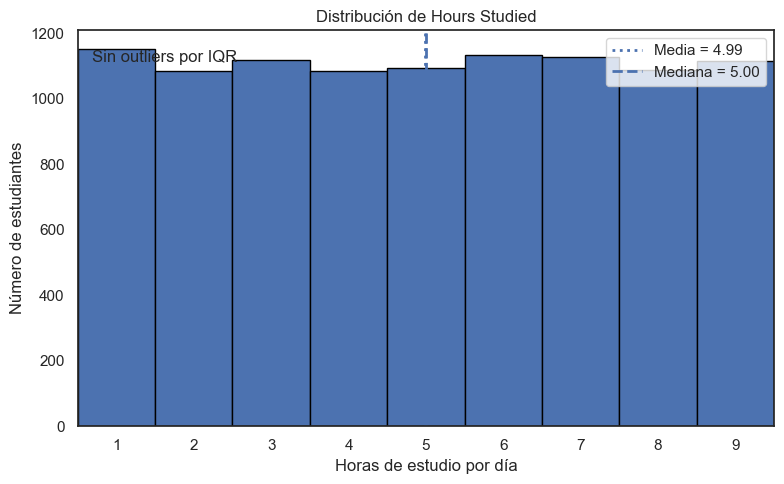

In [267]:
# Histograma Hours Studied con ajustes según describe/info
import numpy as np
col = "Hours Studied"
x = df[col].astype(float)

# Estadísticos una sola vez
mean_, med_ = x.mean(), x.median()

# Bins centrados en enteros 1..9 y ejes fijos
xmin, xmax = int(x.min()), int(x.max())      # 1..9 según tu describe()
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)  # 0.5, 1.5, ..., 9.5

# Outliers por IQR (igual que antes)
Q1, Q3 = x.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
mask_out = (x < lower) | (x > upper)
out_vals = np.sort(x[mask_out].unique())

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Hours Studied")
ax.set_xlabel("Horas de estudio por día")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1))
ax.set_xlim(xmin - 0.5, xmax + 0.5)

# Media/mediana
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Outliers: solo si existen; si no, lo indicamos en la figura
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={mask_out.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper right")
plt.tight_layout()
plt.show()


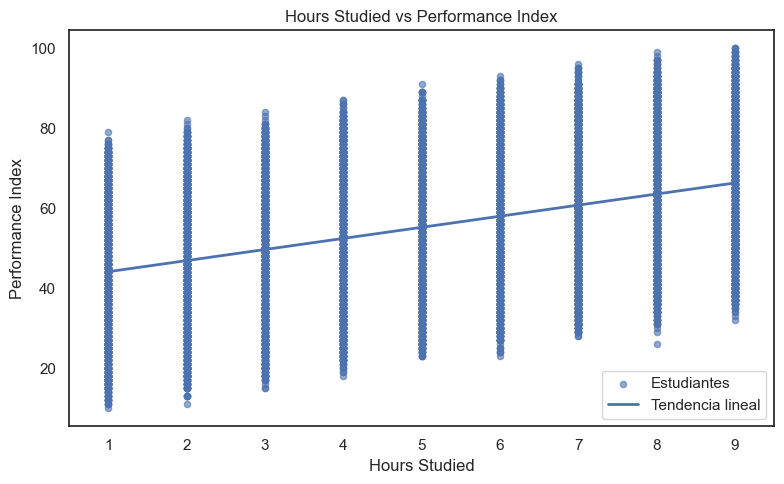

Correlación (Pearson) X-Y: 0.374


In [268]:
y = df["Performance Index"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, alpha=0.6, s=20, label="Estudiantes")

# Recta de tendencia
m, b = np.polyfit(x, y, 1)
xx = np.linspace(xmin, xmax, 100)
ax.plot(xx, m*xx + b, linewidth=2, label="Tendencia lineal")

# (Si no hay outliers, no marcamos nada; si los hubiera:)
if out_vals.size > 0:
    ax.scatter(x[mask_out], y[mask_out], facecolors="none", edgecolors="black", s=80, label="Outliers (IQR)")

ax.set_title("Hours Studied vs Performance Index")
ax.set_xlabel("Hours Studied")
ax.set_ylabel("Performance Index")
ax.set_xticks(np.arange(xmin, xmax + 1))
ax.set_xlim(xmin - 0.5, xmax + 0.5)
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"Correlación (Pearson) X-Y: {np.corrcoef(x, y)[0,1]:.3f}")



####  Distribución de horas de estudio
El histograma nos muestra **cuántos estudiantes estudian cierta cantidad de horas al día**.  
Las barras se ven bastante parejas entre 1 y 9 horas, lo que significa que hay estudiantes en todos los niveles de dedicación.  

 La **media** (promedio) es de ~5 horas y la **mediana** (el valor del medio) también está en 5 horas.  
Esto quiere decir que la mayoría de los estudiantes suelen estudiar alrededor de 5 horas al día.  

---

####  Outliers (valores atípicos)
Con el método **IQR** revisamos si había estudiantes que estudiaban *muchísimo menos* o *muchísimo más* que los demás.  
El cálculo dio límites de **−3 y 13 horas**, pero como en la realidad los datos solo van de **1 a 9 horas**, **no hay valores atípicos**.  

 Conclusión: todos los estudiantes están dentro de un rango normal de estudio.

---

####  Relación con el rendimiento (*Performance Index*)
En el diagrama de dispersión, cada puntito es un estudiante:  
- El eje X son las **horas de estudio**.  
- El eje Y es el **rendimiento académico**.  

Se observa una **tendencia ascendente**:  
- A más horas de estudio, suele aumentar el rendimiento.  
- La correlación de Pearson es **0.37**, lo que indica una relación **positiva pero moderada**.  

Esto significa que **estudiar más ayuda**, pero no es el único factor que influye en las notas. Otros hábitos también cuentan (como dormir bien o practicar con exámenes).

---

 **Resumen sencillo**:  
- La mayoría estudia entre 1 y 9 horas, con un promedio de 5.  
- No hay valores extremos raros.  
- Estudiar más horas generalmente mejora el rendimiento, aunque no lo explica todo.


###   Previous Scores — Calificaciones anteriores de los estudiantes

**Qué veremos:**
- **Histograma:** cómo se reparten las calificaciones previas (bajo/medio/alto).
- **Outliers (IQR):** detección automática con límites ajustados al rango real.
- **Dispersión vs Performance Index:** cómo se relaciona la nota previa con el rendimiento actual.


In [269]:
# %%
# ---------- Utilidad: IQR con límites ajustados al rango observado ----------
def iqr_outliers_report(series: pd.Series, k: float = 1.5, verbose: bool = True):
    s = pd.to_numeric(series, errors="coerce").dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - k*IQR, Q3 + k*IQR

    # Ajuste a los valores realmente observados (evita límites “imposibles”)
    lower_adj = max(lower, s.min())
    upper_adj = min(upper, s.max())

    mask = (s < lower_adj) | (s > upper_adj)
    out_vals = np.sort(s[mask].unique())

    if verbose:
        print(f" Outliers IQR en '{series.name}':")
        print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"Umbrales teóricos: [{lower:.2f}, {upper:.2f}]")
        print(f"Umbrales ajustados al rango observado: [{lower_adj:.2f}, {upper_adj:.2f}]")
        if mask.sum() == 0:
            print("✅ No se detectaron outliers con IQR (ajustado).")
        else:
            print(f"❗ Outliers detectados (n={mask.sum()}): {list(out_vals)}")
    return mask, (lower_adj, upper_adj), out_vals


 Outliers IQR en 'Previous Scores':
Q1=54.00, Q3=85.00, IQR=31.00
Umbrales teóricos: [7.50, 131.50]
Umbrales ajustados al rango observado: [40.00, 99.00]
✅ No se detectaron outliers con IQR (ajustado).


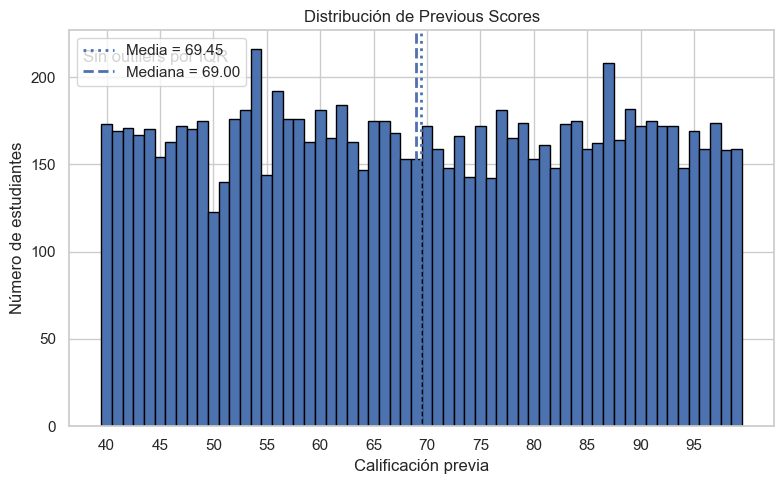

In [270]:
# %%
# ---------- Histograma de Previous Scores con media/mediana y outliers ----------
sns.set(style="whitegrid")

col = "Previous Scores"
x = df[col].astype(float)

# Detección IQR (ajustada)
out_mask, (low_adj, up_adj), out_vals = iqr_outliers_report(x, k=1.5, verbose=True)

# Bins centrados en enteros (40..99 para tu dataset real)
xmin, xmax = int(x.min()), int(x.max())
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Previous Scores")
ax.set_xlabel("Calificación previa")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1, 5))

# Media y mediana
mean_, med_ = x.mean(), x.median()
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Marcar outliers solo si existen
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={out_mask.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


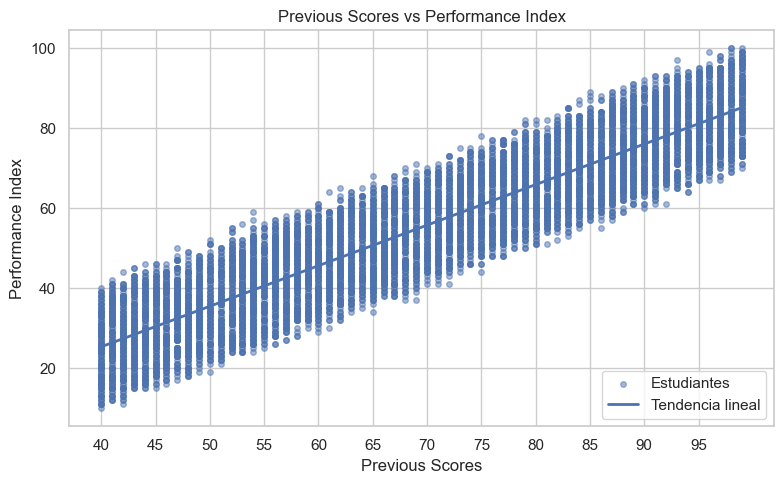

Correlación (Pearson) Previous Scores vs Performance Index: 0.915


In [271]:
# %%
# ---------- Dispersión: Previous Scores vs Performance Index ----------
y = df["Performance Index"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, alpha=0.5, s=16, label="Estudiantes")

# Recta de tendencia (ajuste lineal)
m, b = np.polyfit(x, y, 1)
xx = np.linspace(xmin, xmax, 200)
ax.plot(xx, m*xx + b, linewidth=2, label="Tendencia lineal")

# Resaltar outliers en el scatter (si existen)
if out_vals.size > 0:
    ax.scatter(x[out_mask], y[out_mask], facecolors="none", edgecolors="black", s=80, label="Outliers (IQR)")

ax.set_title("Previous Scores vs Performance Index")
ax.set_xlabel("Previous Scores")
ax.set_ylabel("Performance Index")
ax.set_xticks(np.arange(xmin, xmax + 1, 5))
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Correlación de apoyo
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlación (Pearson) Previous Scores vs Performance Index: {corr:.3f}")



####  Distribución
El histograma muestra cómo se reparten las calificaciones previas.  
La mayoría de los estudiantes están en un rango **medio-alto (60 a 80 puntos)**.  
También hay varios estudiantes con la nota máxima **100**, lo cual refleja un muy buen desempeño.  

 ** Usando el método IQR confirmamos que **no hay valores atípicos** fuera del rango real de 40 a 99.

---

####  Relación con el rendimiento
En el gráfico de dispersión, cada punto representa a un estudiante:  
- En el eje X su **nota previa**.  
- En el eje Y su **rendimiento actual**.  

Se ve una **tendencia ascendente muy clara**:  
- Los que tenían notas altas antes, ahora también suelen rendir mejor.  
- Los que tenían notas más bajas tienden a obtener resultados más bajos.  

 La correlación es **0.91**, lo que indica una **relación muy fuerte**:  
las calificaciones pasadas son un **excelente predictor** del rendimiento actual.

---

 **Resumen sencillo:**  
Las notas previas se concentran entre 60 y 80 puntos, no hay valores extraños,  
y se relacionan fuertemente con el rendimiento actual:  
 **quien fue buen estudiante antes, lo sigue siendo ahora**.


###  Sleep Hours — Horas de sueño por noche
**Qué veremos:**
- **Histograma:** cómo se distribuyen las horas de sueño (mínimo, máximo y valores frecuentes).
- **Outliers (IQR):** detección automática con límites ajustados al rango real (en tu dataset va de 4 a 9 horas).
- **Dispersión vs Performance Index:** cómo se relaciona el sueño con el rendimiento académico.
-  **Boxplot:** cómo cambia el rendimiento según cada cantidad de horas de sueño.


In [272]:
# %%
# ---------- Utilidad: IQR con límites ajustados al rango observado ----------
def iqr_outliers_report(series, k: float = 1.5, verbose: bool = True):
    s = pd.to_numeric(series, errors="coerce").dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - k*IQR, Q3 + k*IQR

    # Ajuste a los valores observados (evita límites irreales)
    lower_adj = max(lower, s.min())
    upper_adj = min(upper, s.max())

    mask = (s < lower_adj) | (s > upper_adj)
    out_vals = np.sort(s[mask].unique())

    if verbose:
        print(f"  Outliers IQR en '{series.name}':")
        print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"Umbrales teóricos: [{lower:.2f}, {upper:.2f}]")
        print(f"Umbrales ajustados al rango observado: [{lower_adj:.2f}, {upper_adj:.2f}]")
        if mask.sum() == 0:
            print("✅ No se detectaron outliers con IQR (ajustado).")
        else:
            print(f"❗ Outliers detectados (n={mask.sum()}): {list(out_vals)}")
    return mask, (lower_adj, upper_adj), out_vals


  Outliers IQR en 'Sleep Hours':
Q1=5.00, Q3=8.00, IQR=3.00
Umbrales teóricos: [0.50, 12.50]
Umbrales ajustados al rango observado: [4.00, 9.00]
✅ No se detectaron outliers con IQR (ajustado).


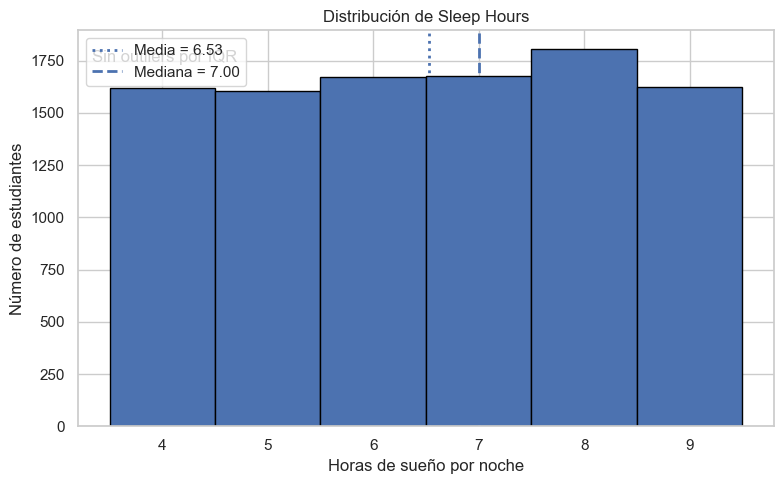

In [273]:
# %%
# ---------- Histograma de Sleep Hours con media/mediana y outliers ----------
sns.set(style="whitegrid")

col = "Sleep Hours"
x = df[col].astype(float)

# Detección IQR (ajustada)
out_mask, (low_adj, up_adj), out_vals = iqr_outliers_report(x, k=1.5, verbose=True)

# Bins centrados en enteros (en tu dataset: 4..9)
xmin, xmax = int(x.min()), int(x.max())
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Sleep Hours")
ax.set_xlabel("Horas de sueño por noche")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1))

# Media y mediana
mean_, med_ = x.mean(), x.median()
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Marcar outliers solo si existen
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={out_mask.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


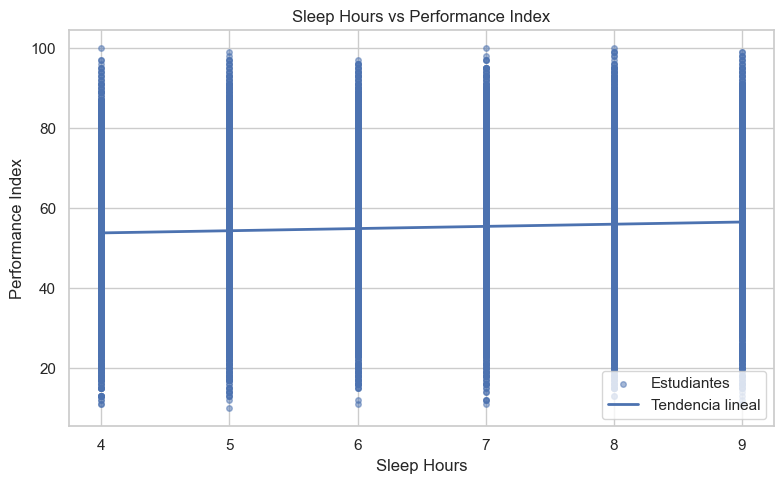

Correlación (Pearson) Sleep Hours vs Performance Index: 0.048


In [274]:
# %%
# ---------- Dispersión: Sleep Hours vs Performance Index ----------
y = df["Performance Index"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, alpha=0.5, s=16, label="Estudiantes")

# Recta de tendencia (ajuste lineal)
m, b = np.polyfit(x, y, 1)
xx = np.linspace(xmin, xmax, 200)
ax.plot(xx, m*xx + b, linewidth=2, label="Tendencia lineal")

# Resaltar outliers en el scatter (si existen)
if out_vals.size > 0:
    ax.scatter(x[out_mask], y[out_mask], facecolors="none", edgecolors="black", s=80, label="Outliers (IQR)")

ax.set_title("Sleep Hours vs Performance Index")
ax.set_xlabel("Sleep Hours")
ax.set_ylabel("Performance Index")
ax.set_xticks(np.arange(xmin, xmax + 1))
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Correlación de apoyo (positiva pero suele ser más débil que 'Hours Studied' o 'Previous Scores')
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlación (Pearson) Sleep Hours vs Performance Index: {corr:.3f}")


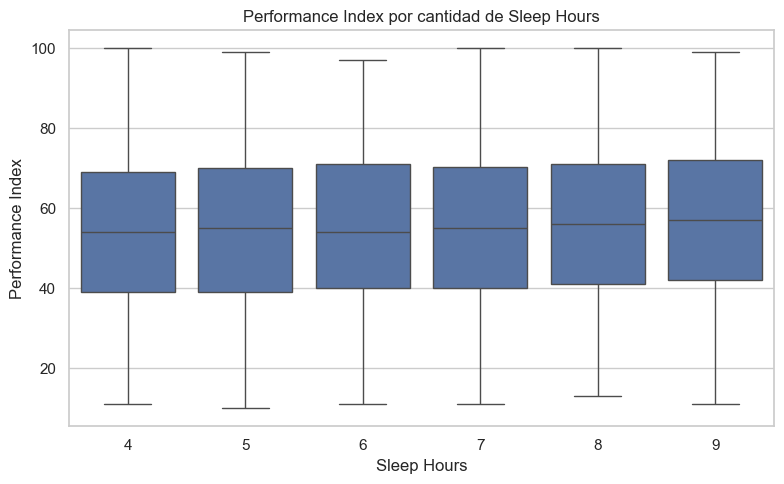

In [275]:
# %%
# ----------  Boxplot: rendimiento por cada cantidad de horas de sueño ----------
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=df[col].astype(int), y=y, ax=ax)
ax.set_title("Performance Index por cantidad de Sleep Hours")
ax.set_xlabel("Sleep Hours")
ax.set_ylabel("Performance Index")
plt.tight_layout()
plt.show()



####  Distribución
- El histograma muestra que la mayoría duerme entre **6 y 9 horas**.
- La **mediana ≈ 7 h** y la **media ≈ 6.5 h** → muchos estudiantes duermen lo “recomendado”.
- Rango observado: **4 a 9 horas**.

####  Outliers (IQR)
- Con **Q1 = 5 h** y **Q3 = 8 h** (IQR = 3 h), los límites teóricos serían 0.5 y 12.5 h,
  pero ajustando al rango real **[4, 9]** se concluye:
-  **No se detectaron outliers** (no hay valores raros de sueño).

####  Relación con el rendimiento
- En el diagrama de dispersión se ve una **tendencia muy suave**: dormir más se asocia
  con un poquito mejor rendimiento.
- **Correlación ≈ 0.05** → relación **positiva pero muy débil**.
- Traducción para peques: **dormir suficiente ayuda**, pero **no es el factor principal** de la nota.

####  Boxplot por cantidad de horas
- Los boxplots de 4, 5, 6, 7, 8 y 9 h muestran **mucho solapamiento**.
- Hay un **ligero aumento** de la mediana del rendimiento al pasar de 6→9 h,
  pero existe **gran variabilidad** en todos los grupos.

####  Resumen sencillo
- No hay valores extraños; la mayoría duerme entre 6–9 h (mediana 7).
- Dormir bien es bueno, pero **estudiar y practicar** parecen influir bastante más en el rendimiento.


### 📑 Sample Question Papers Practiced — Pruebas de práctica realizadas
**Qué veremos:**
- **Histograma:** cuántas pruebas de práctica resolvió cada estudiante (0–9).
- **Outliers (IQR):** verificación automática con límites ajustados al rango real.
- **Dispersión vs Performance Index:** relación entre práctica y rendimiento.
- **Boxplot:** rendimiento según cantidad de prácticas.


In [276]:
# %%
# ---------- Utilidad: IQR con límites ajustados al rango observado ----------
import numpy as np
import pandas as pd

def iqr_outliers_report(series, k: float = 1.5, verbose: bool = True):
    s = pd.to_numeric(series, errors="coerce").dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - k*IQR, Q3 + k*IQR

    # Ajuste a los valores observados (evita límites irreales)
    lower_adj = max(lower, s.min())
    upper_adj = min(upper, s.max())

    mask = (s < lower_adj) | (s > upper_adj)
    out_vals = np.sort(s[mask].unique())

    if verbose:
        print(f" Outliers IQR en '{series.name}':")
        print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"Umbrales teóricos: [{lower:.2f}, {upper:.2f}]")
        print(f"Umbrales ajustados al rango observado: [{lower_adj:.2f}, {upper_adj:.2f}]")
        if mask.sum() == 0:
            print("✅ No se detectaron outliers con IQR (ajustado).")
        else:
            print(f"❗ Outliers detectados (n={mask.sum()}): {list(out_vals)}")
    return mask, (lower_adj, upper_adj), out_vals


 Outliers IQR en 'Sample Question Papers Practiced':
Q1=2.00, Q3=7.00, IQR=5.00
Umbrales teóricos: [-5.50, 14.50]
Umbrales ajustados al rango observado: [0.00, 9.00]
✅ No se detectaron outliers con IQR (ajustado).


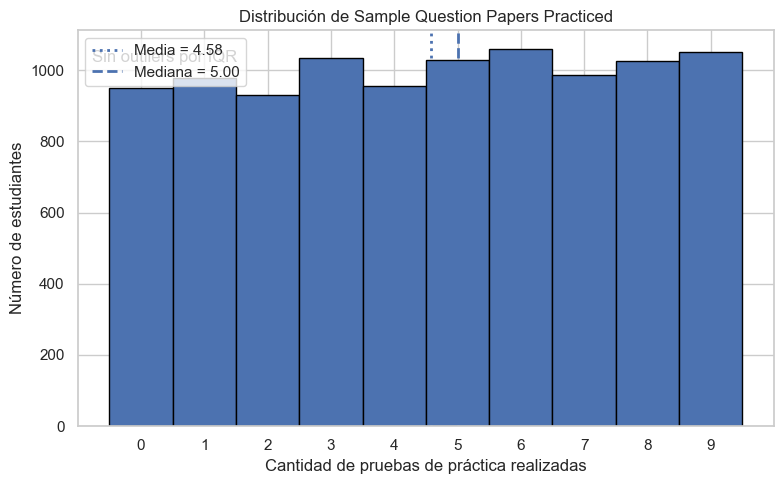

In [277]:
# %%
# ---------- Histograma de Sample Question Papers Practiced ----------
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

col = "Sample Question Papers Practiced"
x = df[col].astype(float)

# Detección IQR (ajustada) — en tu dataset el rango es 0..9
out_mask, (low_adj, up_adj), out_vals = iqr_outliers_report(x, k=1.5, verbose=True)

xmin, xmax = int(x.min()), int(x.max())       # 0..9
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)   # barras centradas en enteros

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Sample Question Papers Practiced")
ax.set_xlabel("Cantidad de pruebas de práctica realizadas")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1))

# Media y mediana
mean_, med_ = x.mean(), x.median()
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Marcar outliers solo si existen
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={out_mask.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


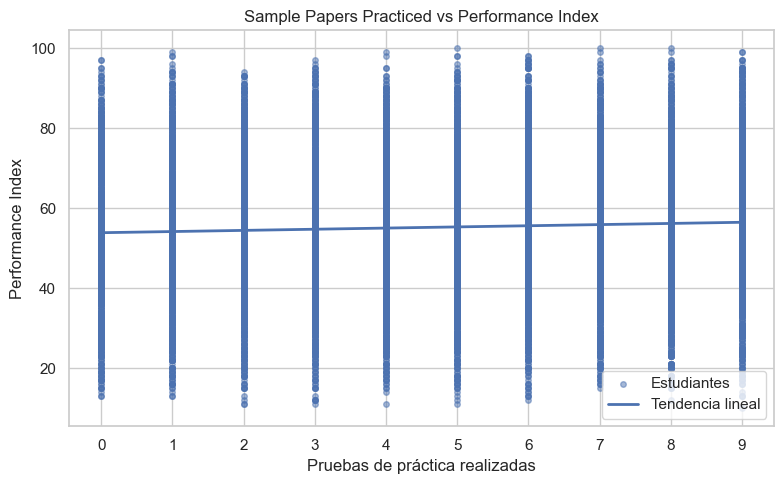

Correlación (Pearson) Sample Papers Practiced vs Performance Index: 0.043


In [278]:
# %%
# ---------- Dispersión: Sample Question Papers Practiced vs Performance Index ----------
y = df["Performance Index"].astype(float)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, alpha=0.5, s=16, label="Estudiantes")

# Recta de tendencia (ajuste lineal)
m, b = np.polyfit(x, y, 1)
xx = np.linspace(xmin, xmax, 200)
ax.plot(xx, m*xx + b, linewidth=2, label="Tendencia lineal")

# Resaltar outliers en el scatter (si existieran)
if out_vals.size > 0:
    ax.scatter(x[out_mask], y[out_mask], facecolors="none", edgecolors="black", s=80, label="Outliers (IQR)")

ax.set_title("Sample Papers Practiced vs Performance Index")
ax.set_xlabel("Pruebas de práctica realizadas")
ax.set_ylabel("Performance Index")
ax.set_xticks(np.arange(xmin, xmax + 1))
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Correlación de apoyo (suele ser positiva moderada)
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlación (Pearson) Sample Papers Practiced vs Performance Index: {corr:.3f}")


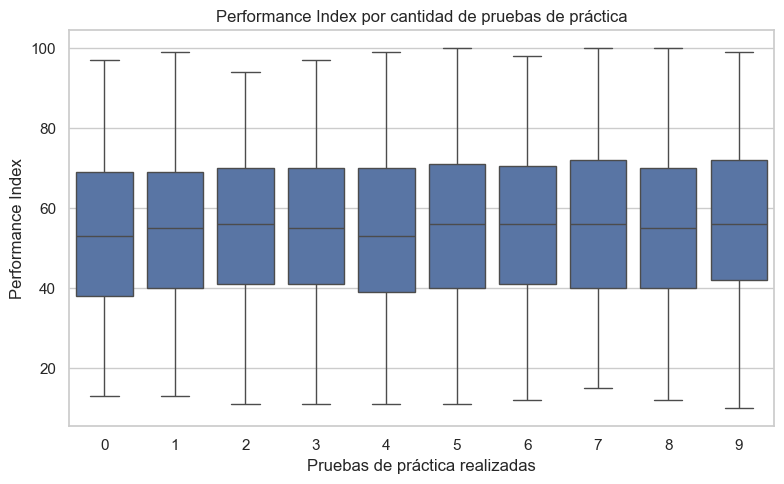

In [279]:
# %%
# ---------- Boxplot: rendimiento por cantidad de prácticas ----------
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x=df[col].astype(int), y=y, ax=ax)
ax.set_title("Performance Index por cantidad de pruebas de práctica")
ax.set_xlabel("Pruebas de práctica realizadas")
ax.set_ylabel("Performance Index")
plt.tight_layout()
plt.show()


####  Distribución
- El histograma muestra cuántas **pruebas de práctica (0–9)** hizo cada estudiante.
- La mayoría se concentra entre **2 y 7 prácticas**.
- **Media ≈ 4.6** y **mediana ≈ 5** → hacer “unas cuantas” prácticas es lo más común.
- Tener **0 prácticas** no es raro (aparece con cierta frecuencia).

####  Outliers (IQR)
- Con **Q1 = 2**, **Q3 = 7** → **IQR = 5**.  
- Límites teóricos IQR: **[-5.5, 14.5]**, pero ajustando al rango real del dataset quedan en **[0, 9]**.  
-  **No se detectaron outliers** (no hay valores extraños fuera del rango observado).

####  Relación con el rendimiento
- En el scatter, cada punto es un estudiante: X = **prácticas**, Y = **Performance Index**.
- Se ve una **tendencia positiva muy suave**: quien practica más **tiende** a rendir un poco mejor.
- **Correlación ≈ 0.04** → la relación es **débil**: practicar ayuda, pero **no explica por sí sola** la nota.

####  Boxplot por cantidad de prácticas
- Las cajas para 0, 1, 2, …, 9 prácticas tienen **mucho solapamiento**.
- La **mediana del rendimiento sube ligeramente** con más prácticas, pero hay **gran variabilidad** en todos los grupos.

####  Resumen sencillo
- No hay valores extraños; la mayoría hizo entre 2 y 7 prácticas.
- Practicar más **ayuda un poquito**, pero la nota depende también de **otros hábitos** (estudiar horas, dormir bien, etc.).

###  Performance Index — Índice de rendimiento académico
**Qué veremos:**
- **Histograma:** cómo se distribuyen los puntajes (10–100).
- **Outliers (IQR):** detección automática con límites ajustados al rango real.
- **Boxplot:** resumen compacto de la mediana, cuartiles y posibles valores atípicos.

In [280]:
# %%
# ---------- Utilidad: IQR con límites ajustados al rango observado ----------
import numpy as np
import pandas as pd

def iqr_outliers_report(series, k: float = 1.5, verbose: bool = True):
    s = pd.to_numeric(series, errors="coerce").dropna()
    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - k*IQR, Q3 + k*IQR

    # Ajuste a los valores observados (evita límites irreales)
    lower_adj = max(lower, s.min())
    upper_adj = min(upper, s.max())

    mask = (s < lower_adj) | (s > upper_adj)
    out_vals = np.sort(s[mask].unique())

    if verbose:
        print(f" Outliers IQR en '{series.name}':")
        print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
        print(f"Umbrales teóricos: [{lower:.2f}, {upper:.2f}]")
        print(f"Umbrales ajustados al rango observado: [{lower_adj:.2f}, {upper_adj:.2f}]")
        if mask.sum() == 0:
            print("✅ No se detectaron outliers con IQR (ajustado).")
        else:
            print(f"❗ Outliers detectados (n={mask.sum()}): {list(out_vals)}")
    return mask, (lower_adj, upper_adj), out_vals


 Outliers IQR en 'Performance Index':
Q1=40.00, Q3=71.00, IQR=31.00
Umbrales teóricos: [-6.50, 117.50]
Umbrales ajustados al rango observado: [10.00, 100.00]
✅ No se detectaron outliers con IQR (ajustado).


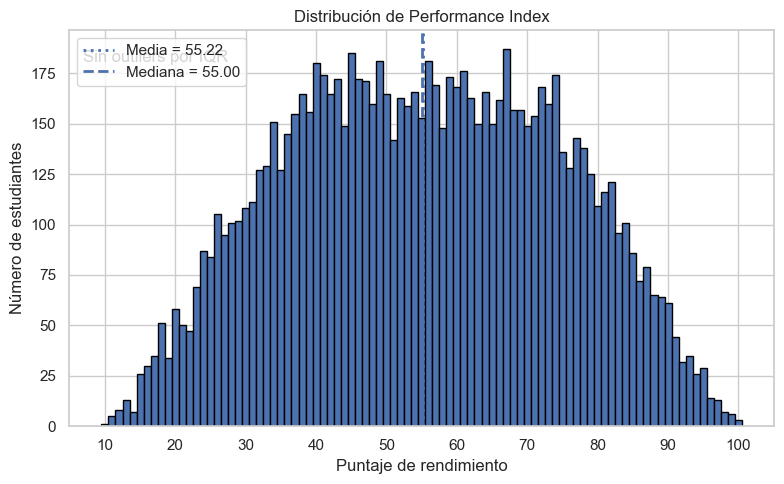

In [281]:
# %%
# ---------- Histograma de Performance Index con media/mediana y outliers ----------
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

col = "Performance Index"
x = df[col].astype(float)

# Detección IQR (ajustada)
out_mask, (low_adj, up_adj), out_vals = iqr_outliers_report(x, k=1.5, verbose=True)

# Bins “centrados” (en tu dataset: ~10..100)
xmin, xmax = int(np.floor(x.min())), int(np.ceil(x.max()))
bins = np.arange(xmin - 0.5, xmax + 1.5, 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=bins, edgecolor="black")
ax.set_title("Distribución de Performance Index")
ax.set_xlabel("Puntaje de rendimiento")
ax.set_ylabel("Número de estudiantes")
ax.set_xticks(np.arange(xmin, xmax + 1, 10))

# Media y mediana
mean_, med_ = x.mean(), x.median()
ax.axvline(mean_, linestyle=":", linewidth=2, label=f"Media = {mean_:.2f}")
ax.axvline(med_,  linestyle="--", linewidth=2, label=f"Mediana = {med_:.2f}")

# Marcar outliers solo si existen
if out_vals.size > 0:
    ax.vlines(out_vals, 0, ax.get_ylim()[1]*0.95, linewidth=1.5, label=f"Outliers IQR (n={out_mask.sum()})")
else:
    ax.text(0.02, 0.95, "Sin outliers por IQR", transform=ax.transAxes, ha="left", va="top")

ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


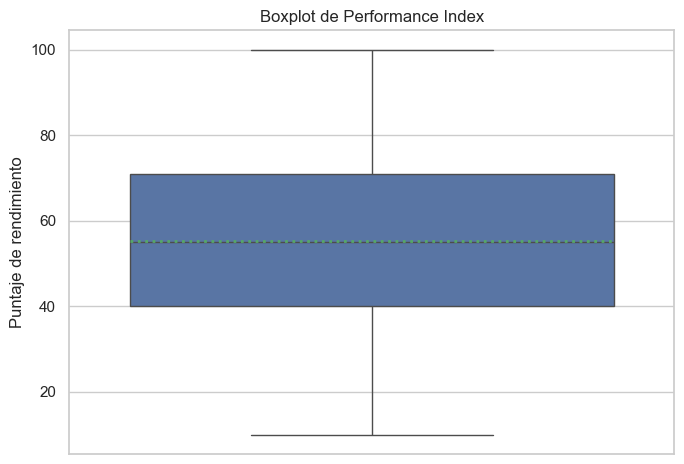

Resumen descriptivo de Performance Index:
                     count     mean        std   min   25%   50%   75%    max
Performance Index  10000.0  55.2248  19.212558  10.0  40.0  55.0  71.0  100.0


In [282]:
# %%
# ---------- Boxplot de Performance Index ----------
fig, ax = plt.subplots(figsize=(7, 4.8))
sns.boxplot(y=x, ax=ax, showmeans=True,
            meanline=True, meanprops={"linestyle":":", "linewidth":2})
ax.set_title("Boxplot de Performance Index")
ax.set_ylabel("Puntaje de rendimiento")
plt.tight_layout()
plt.show()

# (Opcional) Resumen numérico rápido para la celda
print("Resumen descriptivo de Performance Index:")
print(x.describe(percentiles=[0.25, 0.5, 0.75]).to_frame().T)


####  Distribución
- El histograma tiene forma de **montañita** centrada cerca de **55 puntos**.
- La mayoría de los estudiantes está entre **40 y 71** (eso es el **rango intercuartílico**, donde vive el “grueso” de la clase).
- También vemos **algunos puntajes muy altos** (90–100) y **algunos bajos** (10–30), lo cual es normal en un grupo grande.

####  Outliers (IQR)
- Con **Q1 = 40**, **Q3 = 71** → **IQR = 31**.  
- Los límites IQR teóricos se ajustan al rango real **[10, 100]** del dataset.  
-  **No se detectaron outliers** (no hay valores raros fuera de lo esperado).

####  Boxplot
- La **mediana ≈ 55** (la mitad de la clase está por encima y la otra mitad por debajo).
- El “cajón” (40–71) muestra la zona donde está la mayoría.
- Los “bigotes” alcanzan aprox. **10** y **100**, indicando casos más bajos/altos, pero **dentro del rango permitido**.
- La variabilidad es **moderada** (desviación típica ≈ **19**).

####  Resumen sencillo
- La clase tiene un rendimiento **medio** (promedio ≈ **55**).
- Hay estudiantes que **destacan mucho** (cerca de **100**) y otros que **necesitan apoyo** (cerca de **10**).
- No hay valores extraños: la distribución es amplia pero **coherente** para un grupo grande.

### Correlación entre variables (heatmap + ranking vs Performance Index)
**Qué haremos:**
- Convertir `Extracurricular Activities` (Yes/No) a binaria (1/0) para poder correlacionar.
- Calcular la **matriz de correlación de Pearson** entre todas las variables numéricas.
- Visualizar con un **mapa de calor (heatmap)**.
- Mostrar un **ranking** (gráfico de barras) de la correlación de cada variable con **Performance Index**.


In [283]:
# 1) Preparación: codificar variable categórica y seleccionar columnas numéricas
df_corr = df.copy()

# Codificación binaria: Yes=1, No=0 (si ya existiera, se respeta)
if "Extracurricular (bin)" not in df_corr.columns:
    df_corr["Extracurricular (bin)"] = df_corr["Extracurricular Activities"].map({"Yes": 1, "No": 0})

num_cols = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Extracurricular (bin)",
    "Performance Index",
]

# 2) Matriz de correlación (Pearson)
corr = df_corr[num_cols].corr(method="pearson").round(3)

print("Matriz de correlación (Pearson):")
display(corr)


Matriz de correlación (Pearson):


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular (bin),Performance Index
Hours Studied,1.000,-0.012,0.001,0.017,0.004,0.374
Previous Scores,-0.012,1.000,0.006,0.008,0.008,0.915
Sleep Hours,0.001,0.006,1.000,0.004,-0.023,0.048
Sample Question Papers Practiced,0.017,0.008,0.004,1.000,0.013,0.043
Extracurricular (bin),0.004,0.008,-0.023,0.013,1.000,0.025
Performance Index,0.374,0.915,0.048,0.043,0.025,1.000


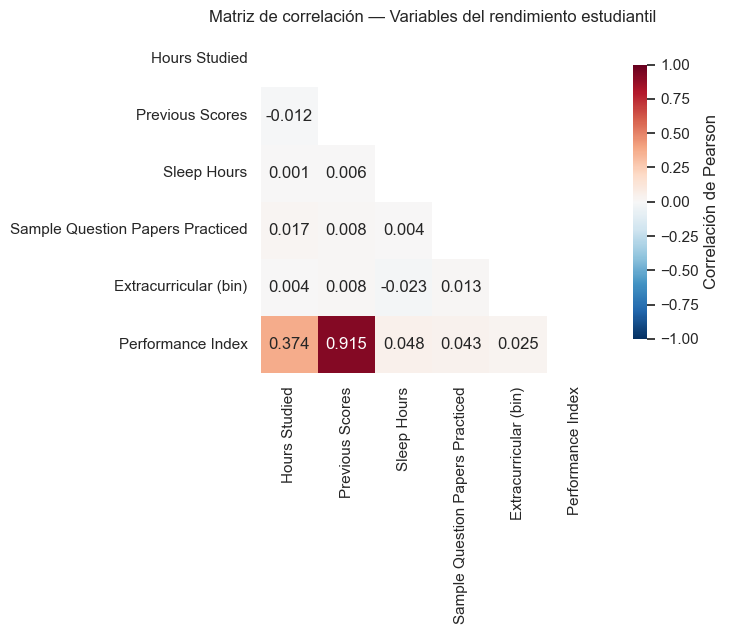

In [284]:
# 3) Heatmap (mapa de calor) con la mitad inferior para evitar duplicados
sns.set(style="white", font_scale=1.0)

# Máscara para la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(8.5, 6.5))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,         # muestra el valor numérico
    fmt=".3f",
    cmap="RdBu_r",      # azul-negativo / rojo-positivo
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlación de Pearson"},
    ax=ax
)
ax.set_title("Matriz de correlación — Variables del rendimiento estudiantil")
plt.tight_layout()
plt.show()


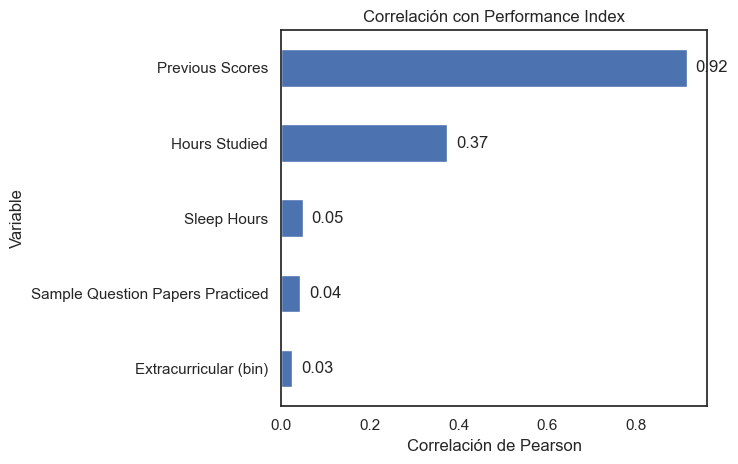

Correlaciones con Performance Index (de menor a mayor):


Extracurricular (bin)               0.025
Sample Question Papers Practiced    0.043
Sleep Hours                         0.048
Hours Studied                       0.374
Previous Scores                     0.915
Name: Performance Index, dtype: float64

In [285]:
# 4) Ranking: correlación de cada variable con el Performance Index
target = "Performance Index"
corr_vs_target = (
    corr[target]
    .drop(target)        # quitamos la autocorrelación con el propio target
    .sort_values(ascending=True)
)

fig, ax = plt.subplots(figsize=(7.5, 4.8))
corr_vs_target.plot(kind="barh", ax=ax)
ax.set_title(f"Correlación con {target}")
ax.set_xlabel("Correlación de Pearson")
ax.set_ylabel("Variable")
for i, v in enumerate(corr_vs_target.values):
    ax.text(v + (0.02 if v >= 0 else -0.02), i, f"{v:.2f}",
            va="center", ha="left" if v >= 0 else "right")
plt.tight_layout()
plt.show()

print("Correlaciones con Performance Index (de menor a mayor):")
display(corr_vs_target.to_frame("corr").T if corr_vs_target.empty else corr_vs_target)


####  ¿Qué es la correlación?
Es un número entre **-1** y **1** que dice qué tan juntas cambian dos cosas:
- **+1**: cuando una sube, la otra también (muy conectadas).
- **0**: casi no están relacionadas.
- **-1**: cuando una sube, la otra baja.

En el **heatmap**, los colores más intensos (rojos/azules) marcan correlaciones más fuertes.  
En el **ranking**, vemos qué hábitos(variables) se relacionan más con la nota final (*Performance Index*).

####  Hallazgos clave de tu dataset
- **Previous Scores → Performance Index: r ≈ 0.92 (muy fuerte)**  
  Quien tenía **buenas notas antes** suele **rendir muy bien ahora**. Es el mejor predictor.
- **Hours Studied → Performance Index: r ≈ 0.37 (moderada)**  
  **Estudiar más** ayuda, aunque no explica todo.
- **Sleep Hours: r ≈ 0.05**, **Sample Papers Practiced: r ≈ 0.04**, **Extracurricular (bin): r ≈ 0.03**  
  Relaciones **muy débiles** con la nota en este dataset: dormir/practicar/actividades suman un poquito, pero **no determinan** el resultado.

####  Entre las variables entre sí
Las correlaciones entre hábitos (estudio, sueño, prácticas) son **cercanas a 0** → se comportan **casi independientes**.  
Ej.: *Hours Studied* vs *Previous Scores* ≈ **-0.01** (prácticamente nada).

####  Qué nos llevamos
- Para mejorar el rendimiento: **reforzar bases (Previous Scores)** y **aumentar horas de estudio efectivas**.  
- Dormir y practicar ayudan, pero su efecto es **pequeño** aquí.  
- Actividades extracurriculares son **neutras para la nota** (aunque pueden tener otros beneficios).

> Nota: **Correlación no es causalidad**. Solo mide relaciones **lineales**; otros factores no observados también pueden influir.


###  Limpieza: eliminación de duplicados exactos

Antes de dividir el dataset (random/stratified) vamos a **eliminar filas duplicadas exactas**  
(filas idénticas en **todas** las columnas, incluido el *Performance Index*).  
Esto evita **fuga de información**: si una copia cae en *train* y otra en *test*, el modelo habría “visto”  
ese ejemplo y las métricas quedarían artificialmente optimistas.

> Nota: **solo** eliminamos duplicados exactos.  
> Si existen filas con **el mismo vector de características** pero **distinto target**, no se borran;  
> eso no es un error sino **variabilidad/noise** y se maneja en la **división por grupos** (para que no se mezclen entre *train* y *test*).



In [286]:
# Contar y eliminar duplicados exactos (todas las columnas)
n_before = len(df)
dup_exact = df.duplicated().sum()
print(f"Filas totales antes: {n_before}")
print(f"Duplicados exactos detectados: {dup_exact}")

# Eliminación
df = df.drop_duplicates().reset_index(drop=True)

# Comprobaciones
n_after = len(df)
print(f"Tamaño tras deduplicar: {df.shape}")
print(f"Duplicados exactos restantes: {df.duplicated().sum()}")
print(f"Filas eliminadas: {n_before - n_after}")


Filas totales antes: 10000
Duplicados exactos detectados: 127
Tamaño tras deduplicar: (9873, 6)
Duplicados exactos restantes: 0
Filas eliminadas: 127


In [287]:
# %%
feature_cols = ["Hours Studied","Previous Scores","Sleep Hours",
                "Sample Question Papers Practiced","Extracurricular Activities"]

feat_dups = df.duplicated(subset=feature_cols, keep=False).sum()
print(f"Filas que comparten exactamente el mismo vector de features: {feat_dups}")
# Estas NO se eliminan aquí; se manejarán en el split por grupos.


Filas que comparten exactamente el mismo vector de features: 1312


### 🧽 Limpieza y transformación — Resumen corto

- **Estructura y tipos.** El dataset tiene **6 columnas**: **5 numéricas** y **1 categórica** (`Extracurricular Activities`).  
  Los tipos son correctos para el análisis.

- **Valores nulos.** **No hay** valores faltantes (`df.info()`), así que **no** fue necesario imputar nada.

- **Rangos válidos.** Todos los datos están dentro de lo esperable:  
  `Hours Studied 1–9`, `Previous Scores 40–99`, `Sleep Hours 4–9`,  
  `Sample Papers Practiced 0–9`, `Performance Index 10–100`,  
  `Extracurricular Activities: Yes/No`.

- **Outliers (IQR ajustado).** Revisamos las 5 columnas numéricas con el método IQR y, al
  ajustar los límites al rango real, **no se detectaron outliers** relevantes.  
  → No hicimos recortes ni transformaciones especiales.

- **Duplicados.**
  - **Eliminamos 127 filas duplicadas exactas** (idénticas en todas las columnas) para evitar “copias” del mismo caso.
  - Detectamos **1 312 filas** que **comparten exactamente el mismo vector de características** (mismo X) pero pueden tener
    **distinto `Performance Index`**. *No se eliminan*; se manejarán en la **división del dataset por grupos de features**
    (así no cae el mismo X en train y test y evitamos fuga de información).

- **Codificación categórica.** Para correlaciones/modelos creamos `Extracurricular (bin)`:
  `Yes → 1`, `No → 0`.

- **Consistencia de enteros.** Mantenemos como enteras las variables discretas
  (`Hours Studied`, `Sleep Hours`, `Sample Papers Practiced`) para graficar y contar correctamente.

- **Escalado.** Para el EDA no hace falta. Para **regresión con descenso del gradiente** puede ayudar **estandarizar**
  (media 0, desvío 1) las features numéricas para que el entrenamiento sea más estable.

**Conclusión.** Tras quitar duplicados exactos, el dataset queda **limpio y coherente**; no hay nulos ni outliers relevantes.
Añadimos la columna binaria de extracurriculares y **dividiremos por grupos de features** para evaluar el modelo sin fugas.


---

# D. División del Dataset

En esta sección implementaremos manualmente los métodos de división del dataset sin usar funciones de scikit-learn como `train_test_split`. Implementaremos:

1. **Muestreo aleatorio (Random Sampling)**
2. **Muestreo estratificado (Stratified Sampling)**

El conjunto de datos se dividirá en:
- **70% entrenamiento**
- **15% validación** 
- **15% prueba**

## D.1. Muestreo Aleatorio (Random Sampling)

El muestreo aleatorio simple selecciona muestras de manera completamente aleatoria sin considerar ninguna característica específica. Es el método más básico y directo.


In [288]:
# Implementación manual de Random Sampling
import numpy as np
import pandas as pd

def random_sampling_split(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_state=42):
    """
    Divide el dataset usando muestreo aleatorio simple
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        Dataset a dividir
    train_ratio : float
        Proporción para entrenamiento (default: 0.7)
    val_ratio : float
        Proporción para validación (default: 0.15)
    test_ratio : float
        Proporción para prueba (default: 0.15)
    random_state : int
        Semilla para reproducibilidad
        
    Retorna:
    --------
    tuple
        (df_train, df_val, df_test) - DataFrames divididos
    """
    
    # Verificar que las proporciones sumen 1.0
    total_ratio = train_ratio + val_ratio + test_ratio
    if not np.isclose(total_ratio, 1.0, atol=1e-6):
        raise ValueError(f"Las proporciones deben sumar 1.0, pero suman {total_ratio}")
    
    # Configurar semilla para reproducibilidad
    np.random.seed(random_state)
    
    # Obtener índices del dataset
    n_samples = len(df)
    indices = np.arange(n_samples)
    
    # Mezclar los índices aleatoriamente
    shuffled_indices = np.random.permutation(indices)
    
    # Calcular los puntos de corte
    train_end = int(n_samples * train_ratio)
    val_end = train_end + int(n_samples * val_ratio)
    
    # Dividir los índices
    train_indices = shuffled_indices[:train_end]
    val_indices = shuffled_indices[train_end:val_end]
    test_indices = shuffled_indices[val_end:]
    
    # Crear los DataFrames divididos (preservar índices originales para evitar solapamiento)
    df_train = df.iloc[train_indices]
    df_val = df.iloc[val_indices]
    df_test = df.iloc[test_indices]
    
    return df_train, df_val, df_test

# Aplicar Random Sampling al dataset
print("=== DIVISIÓN CON RANDOM SAMPLING ===")
print(f"Tamaño total del dataset: {len(df)} muestras")
print(f"Proporciones: 70% entrenamiento, 15% validación, 15% prueba")
print("-" * 50)

# Realizar la división
df_train_random, df_val_random, df_test_random = random_sampling_split(
    df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_state=42
)

# Mostrar resultados
print(f"Conjunto de entrenamiento: {len(df_train_random)} muestras ({len(df_train_random)/len(df)*100:.1f}%)")
print(f"Conjunto de validación:    {len(df_val_random)} muestras ({len(df_val_random)/len(df)*100:.1f}%)")
print(f"Conjunto de prueba:        {len(df_test_random)} muestras ({len(df_test_random)/len(df)*100:.1f}%)")

# Verificar que no hay solapamiento
train_indices = set(df_train_random.index)
val_indices = set(df_val_random.index)
test_indices = set(df_test_random.index)

print(f"\n=== VERIFICACIÓN DE SOLAPAMIENTO ===")
print(f"¿Train ∩ Val vacío?: {train_indices.isdisjoint(val_indices)}")
print(f"¿Train ∩ Test vacío?: {train_indices.isdisjoint(test_indices)}")
print(f"¿Val ∩ Test vacío?: {val_indices.isdisjoint(test_indices)}")

# Mostrar estadísticas descriptivas de cada conjunto
print(f"\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print("Performance Index por conjunto:")
print(f"Entrenamiento - Media: {df_train_random['Performance Index'].mean():.2f}, Std: {df_train_random['Performance Index'].std():.2f}")
print(f"Validación    - Media: {df_val_random['Performance Index'].mean():.2f}, Std: {df_val_random['Performance Index'].std():.2f}")
print(f"Prueba        - Media: {df_test_random['Performance Index'].mean():.2f}, Std: {df_test_random['Performance Index'].std():.2f}")


=== DIVISIÓN CON RANDOM SAMPLING ===
Tamaño total del dataset: 9873 muestras
Proporciones: 70% entrenamiento, 15% validación, 15% prueba
--------------------------------------------------
Conjunto de entrenamiento: 6911 muestras (70.0%)
Conjunto de validación:    1480 muestras (15.0%)
Conjunto de prueba:        1482 muestras (15.0%)

=== VERIFICACIÓN DE SOLAPAMIENTO ===
¿Train ∩ Val vacío?: True
¿Train ∩ Test vacío?: True
¿Val ∩ Test vacío?: True

=== ESTADÍSTICAS DESCRIPTIVAS ===
Performance Index por conjunto:
Entrenamiento - Media: 55.35, Std: 19.27
Validación    - Media: 55.17, Std: 18.99
Prueba        - Media: 54.63, Std: 19.15


## D.2. Muestreo Estratificado (Stratified Sampling)

El muestreo estratificado divide el dataset en estratos (grupos) basados en una variable de estratificación y luego toma muestras de cada estrato manteniendo las proporciones. Para regresión, típicamente se usan cuartiles o deciles de la variable objetivo.

### Ventajas del muestreo estratificado:
- **Representatividad**: Cada conjunto mantiene la distribución de la variable objetivo
- **Reducción de varianza**: Mejora la estimación del error del modelo
- **Balance**: Evita que un conjunto tenga solo valores extremos


In [289]:
# Implementación manual de Stratified Sampling
def stratified_sampling_split(df, target_column, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, 
                             n_strata=4, random_state=42):
    """
    Divide el dataset usando muestreo estratificado basado en cuartiles de la variable objetivo
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        Dataset a dividir
    target_column : str
        Nombre de la columna objetivo para estratificación
    train_ratio : float
        Proporción para entrenamiento (default: 0.7)
    val_ratio : float
        Proporción para validación (default: 0.15)
    test_ratio : float
        Proporción para prueba (default: 0.15)
    n_strata : int
        Número de estratos (default: 4 para cuartiles)
    random_state : int
        Semilla para reproducibilidad
        
    Retorna:
    --------
    tuple
        (df_train, df_val, df_test) - DataFrames divididos
    """
    
    # Verificar que las proporciones sumen 1.0
    total_ratio = train_ratio + val_ratio + test_ratio
    if not np.isclose(total_ratio, 1.0, atol=1e-6):
        raise ValueError(f"Las proporciones deben sumar 1.0, pero suman {total_ratio}")
    
    # Configurar semilla para reproducibilidad
    np.random.seed(random_state)
    
    # Crear copia del DataFrame para no modificar el original
    df_copy = df.copy()
    
    # Crear estratos basados en cuartiles de la variable objetivo
    df_copy['stratum'] = pd.qcut(df_copy[target_column], q=n_strata, labels=False, duplicates='drop')
    
    # Listas para almacenar los índices de cada conjunto
    train_indices = []
    val_indices = []
    test_indices = []
    
    # Procesar cada estrato
    for stratum in range(n_strata):
        stratum_data = df_copy[df_copy['stratum'] == stratum]
        stratum_indices = stratum_data.index.tolist()
        
        # Mezclar los índices del estrato
        np.random.shuffle(stratum_indices)
        
        # Calcular los puntos de corte para este estrato
        n_stratum = len(stratum_indices)
        train_end = int(n_stratum * train_ratio)
        val_end = train_end + int(n_stratum * val_ratio)
        
        # Dividir los índices del estrato
        train_indices.extend(stratum_indices[:train_end])
        val_indices.extend(stratum_indices[train_end:val_end])
        test_indices.extend(stratum_indices[val_end:])
    
    # Crear los DataFrames divididos (preservar índices originales para evitar solapamiento)
    df_train = df.iloc[train_indices]
    df_val = df.iloc[val_indices]
    df_test = df.iloc[test_indices]
    
    return df_train, df_val, df_test

# Aplicar Stratified Sampling al dataset
print("=== DIVISIÓN CON STRATIFIED SAMPLING ===")
print(f"Tamaño total del dataset: {len(df)} muestras")
print(f"Proporciones: 70% entrenamiento, 15% validación, 15% prueba")
print(f"Estratificación: 4 cuartiles basados en 'Performance Index'")
print("-" * 60)

# Realizar la división estratificada
df_train_stratified, df_val_stratified, df_test_stratified = stratified_sampling_split(
    df, target_column='Performance Index', train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, 
    n_strata=4, random_state=42
)

# Mostrar resultados
print(f"Conjunto de entrenamiento: {len(df_train_stratified)} muestras ({len(df_train_stratified)/len(df)*100:.1f}%)")
print(f"Conjunto de validación:    {len(df_val_stratified)} muestras ({len(df_val_stratified)/len(df)*100:.1f}%)")
print(f"Conjunto de prueba:        {len(df_test_stratified)} muestras ({len(df_test_stratified)/len(df)*100:.1f}%)")

# Verificar que no hay solapamiento
train_indices = set(df_train_stratified.index)
val_indices = set(df_val_stratified.index)
test_indices = set(df_test_stratified.index)

print(f"\n=== VERIFICACIÓN DE SOLAPAMIENTO ===")
print(f"¿Train ∩ Val vacío?: {train_indices.isdisjoint(val_indices)}")
print(f"¿Train ∩ Test vacío?: {train_indices.isdisjoint(test_indices)}")
print(f"¿Val ∩ Test vacío?: {val_indices.isdisjoint(test_indices)}")

# Mostrar estadísticas descriptivas de cada conjunto
print(f"\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print("Performance Index por conjunto:")
print(f"Entrenamiento - Media: {df_train_stratified['Performance Index'].mean():.2f}, Std: {df_train_stratified['Performance Index'].std():.2f}")
print(f"Validación    - Media: {df_val_stratified['Performance Index'].mean():.2f}, Std: {df_val_stratified['Performance Index'].std():.2f}")
print(f"Prueba        - Media: {df_test_stratified['Performance Index'].mean():.2f}, Std: {df_test_stratified['Performance Index'].std():.2f}")

# Mostrar distribución por cuartiles en cada conjunto
print(f"\n=== DISTRIBUCIÓN POR CUARTILES ===")
def show_quartile_distribution(df, name):
    q1 = df['Performance Index'].quantile(0.25)
    q2 = df['Performance Index'].quantile(0.50)
    q3 = df['Performance Index'].quantile(0.75)
    
    q1_count = len(df[df['Performance Index'] <= q1])
    q2_count = len(df[(df['Performance Index'] > q1) & (df['Performance Index'] <= q2)])
    q3_count = len(df[(df['Performance Index'] > q2) & (df['Performance Index'] <= q3)])
    q4_count = len(df[df['Performance Index'] > q3])
    
    total = len(df)
    print(f"{name}:")
    print(f"  Q1 (≤{q1:.1f}): {q1_count} ({q1_count/total*100:.1f}%)")
    print(f"  Q2 ({q1:.1f}-{q2:.1f}): {q2_count} ({q2_count/total*100:.1f}%)")
    print(f"  Q3 ({q2:.1f}-{q3:.1f}): {q3_count} ({q3_count/total*100:.1f}%)")
    print(f"  Q4 (>{q3:.1f}): {q4_count} ({q4_count/total*100:.1f}%)")

show_quartile_distribution(df_train_stratified, "Entrenamiento")
show_quartile_distribution(df_val_stratified, "Validación")
show_quartile_distribution(df_test_stratified, "Prueba")


=== DIVISIÓN CON STRATIFIED SAMPLING ===
Tamaño total del dataset: 9873 muestras
Proporciones: 70% entrenamiento, 15% validación, 15% prueba
Estratificación: 4 cuartiles basados en 'Performance Index'
------------------------------------------------------------
Conjunto de entrenamiento: 6910 muestras (70.0%)
Conjunto de validación:    1479 muestras (15.0%)
Conjunto de prueba:        1484 muestras (15.0%)

=== VERIFICACIÓN DE SOLAPAMIENTO ===
¿Train ∩ Val vacío?: True
¿Train ∩ Test vacío?: True
¿Val ∩ Test vacío?: True

=== ESTADÍSTICAS DESCRIPTIVAS ===
Performance Index por conjunto:
Entrenamiento - Media: 55.26, Std: 19.14
Validación    - Media: 55.08, Std: 19.49
Prueba        - Media: 55.15, Std: 19.27

=== DISTRIBUCIÓN POR CUARTILES ===
Entrenamiento:
  Q1 (≤40.0): 1771 (25.6%)
  Q2 (40.0-55.0): 1712 (24.8%)
  Q3 (55.0-70.0): 1700 (24.6%)
  Q4 (>70.0): 1727 (25.0%)
Validación:
  Q1 (≤40.0): 379 (25.6%)
  Q2 (40.0-55.0): 366 (24.7%)
  Q3 (55.0-70.5): 364 (24.6%)
  Q4 (>70.5): 370 (2

## D.3. Comparación entre Random Sampling y Stratified Sampling

Ahora compararemos ambos métodos de división para entender sus diferencias y ventajas.


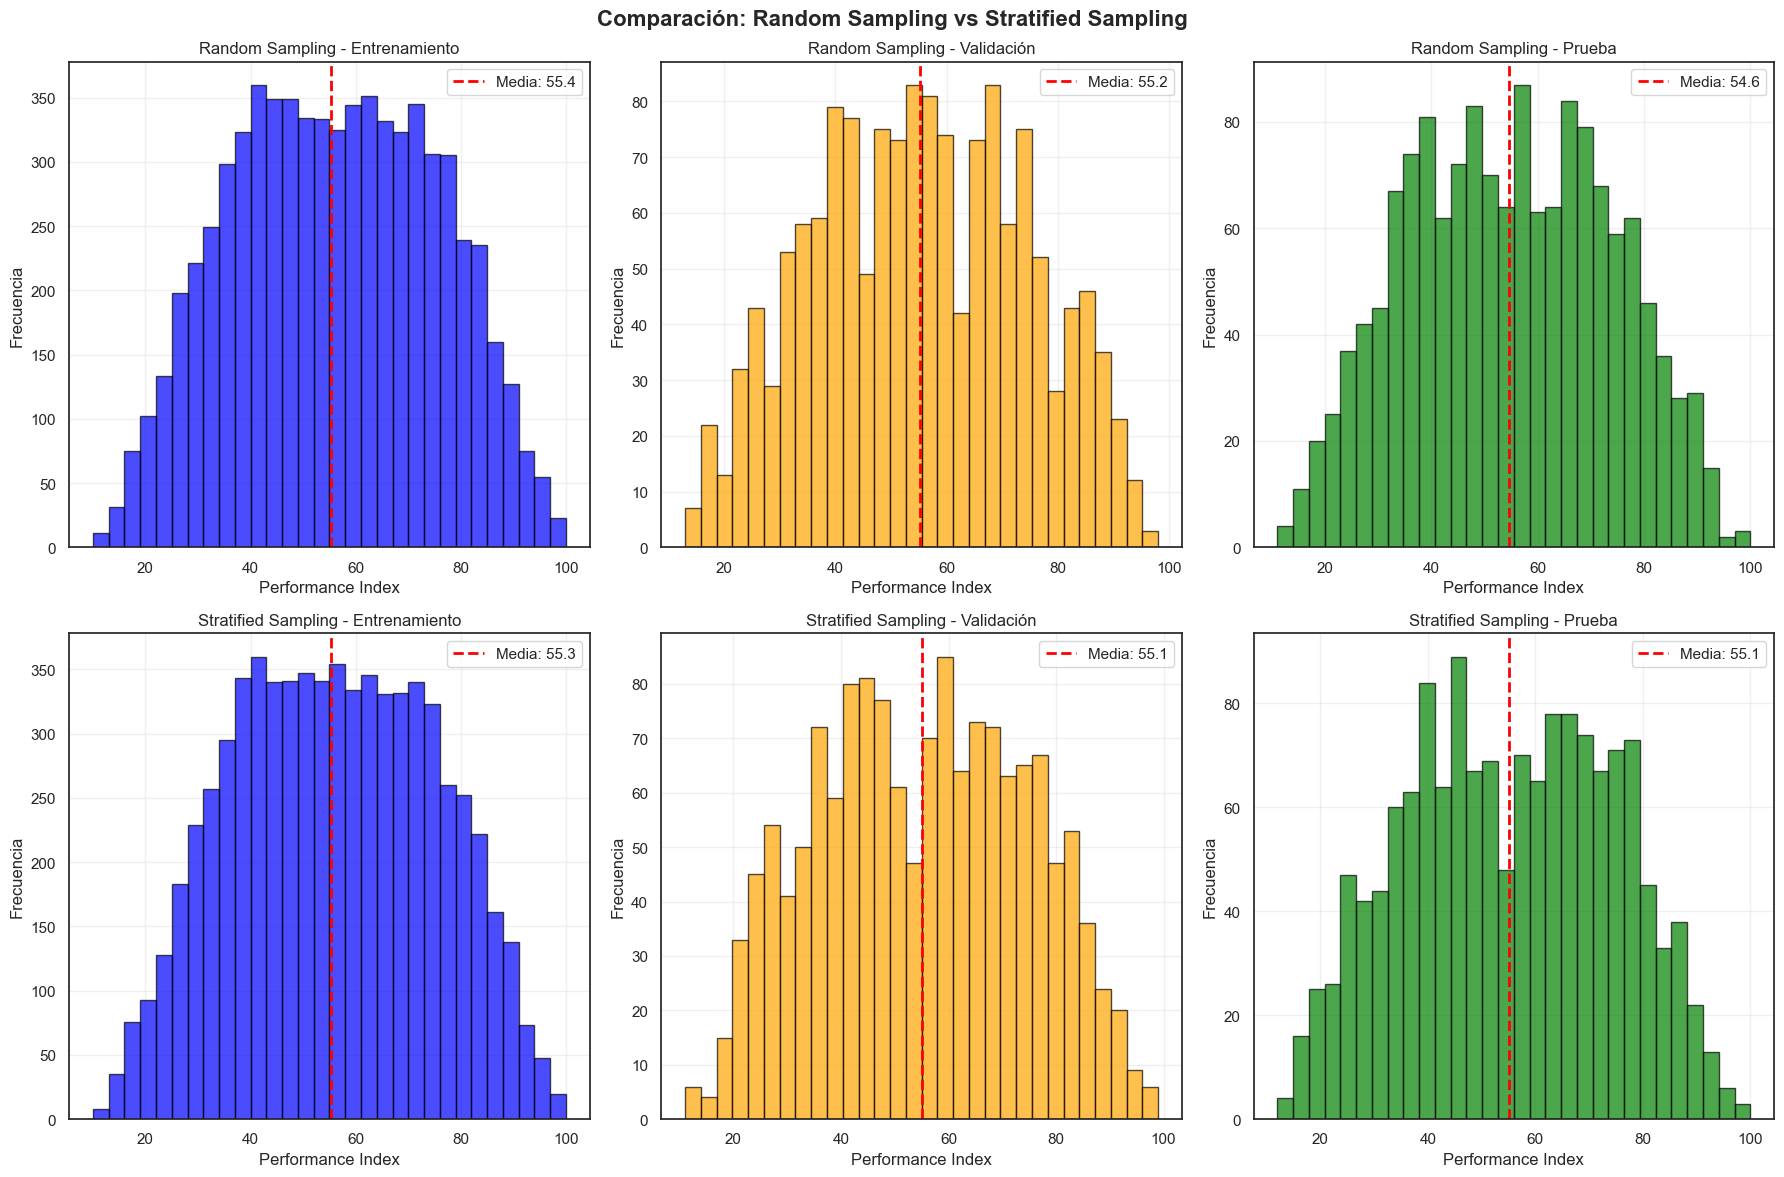

=== ANÁLISIS ESTADÍSTICO COMPARATIVO ===
------------------------------------------------------------
       Método Conjunto  Tamaño  Media    Std   Min    Max    Q1    Q2     Q3
0      Random    train    6911  55.35  19.27  10.0  100.0  40.0  55.0  71.00
1      Random      val    1480  55.17  18.99  13.0   98.0  41.0  55.0  70.00
2      Random     test    1482  54.63  19.15  11.0  100.0  39.0  55.0  70.00
3  Stratified    train    6910  55.26  19.14  10.0  100.0  40.0  55.0  70.00
4  Stratified      val    1479  55.08  19.49  11.0   99.0  40.0  55.0  70.50
5  Stratified     test    1484  55.15  19.27  12.0  100.0  40.0  55.0  70.25

=== ANÁLISIS DE VARIANZA ENTRE CONJUNTOS ===
--------------------------------------------------
Random Sampling:
  Medias: Train=55.35, Val=55.17, Test=54.63
  Varianza entre medias: 0.0926
  Diferencia máxima entre medias: 0.72
Stratified Sampling:
  Medias: Train=55.26, Val=55.08, Test=55.15
  Varianza entre medias: 0.0056
  Diferencia máxima entre media

In [290]:
# Comparación entre Random Sampling y Stratified Sampling
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los datasets globalmente para poder usarlos después
datasets = {
    'Random': {
        'train': df_train_random['Performance Index'],
        'val': df_val_random['Performance Index'],
        'test': df_test_random['Performance Index']
    },
    'Stratified': {
        'train': df_train_stratified['Performance Index'],
        'val': df_val_stratified['Performance Index'],
        'test': df_test_stratified['Performance Index']
    }
}

def compare_sampling_methods():
    """
    Compara visualmente los dos métodos de muestreo
    """
    
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comparación: Random Sampling vs Stratified Sampling', fontsize=16, fontweight='bold')
    
    # Colores para cada conjunto
    colors = {'train': 'blue', 'val': 'orange', 'test': 'green'}
    sets = ['train', 'val', 'test']
    set_names = ['Entrenamiento', 'Validación', 'Prueba']
    
    # Histogramas para Random Sampling
    for i, (set_name, color) in enumerate(zip(sets, colors.values())):
        axes[0, i].hist(datasets['Random'][set_name], bins=30, alpha=0.7, color=color, edgecolor='black')
        axes[0, i].set_title(f'Random Sampling - {set_names[i]}')
        axes[0, i].set_xlabel('Performance Index')
        axes[0, i].set_ylabel('Frecuencia')
        axes[0, i].grid(True, alpha=0.3)
        
        # Añadir estadísticas
        mean_val = datasets['Random'][set_name].mean()
        std_val = datasets['Random'][set_name].std()
        axes[0, i].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                          label=f'Media: {mean_val:.1f}')
        axes[0, i].legend()
    
    # Histogramas para Stratified Sampling
    for i, (set_name, color) in enumerate(zip(sets, colors.values())):
        axes[1, i].hist(datasets['Stratified'][set_name], bins=30, alpha=0.7, color=color, edgecolor='black')
        axes[1, i].set_title(f'Stratified Sampling - {set_names[i]}')
        axes[1, i].set_xlabel('Performance Index')
        axes[1, i].set_ylabel('Frecuencia')
        axes[1, i].grid(True, alpha=0.3)
        
        # Añadir estadísticas
        mean_val = datasets['Stratified'][set_name].mean()
        std_val = datasets['Stratified'][set_name].std()
        axes[1, i].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                          label=f'Media: {mean_val:.1f}')
        axes[1, i].legend()
    
    plt.tight_layout()
    plt.show()

# Ejecutar la comparación visual
compare_sampling_methods()

# Análisis estadístico comparativo
print("=== ANÁLISIS ESTADÍSTICO COMPARATIVO ===")
print("-" * 60)

# Crear DataFrame comparativo
comparison_data = []

for method_name, method_data in [('Random', datasets['Random']), ('Stratified', datasets['Stratified'])]:
    for set_name, set_data in method_data.items():
        comparison_data.append({
            'Método': method_name,
            'Conjunto': set_name,
            'Tamaño': len(set_data),
            'Media': set_data.mean(),
            'Std': set_data.std(),
            'Min': set_data.min(),
            'Max': set_data.max(),
            'Q1': set_data.quantile(0.25),
            'Q2': set_data.quantile(0.50),
            'Q3': set_data.quantile(0.75)
        })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(2))

# Análisis de varianza entre conjuntos
print(f"\n=== ANÁLISIS DE VARIANZA ENTRE CONJUNTOS ===")
print("-" * 50)

def analyze_variance(method_name, datasets):
    train_mean = datasets['train'].mean()
    val_mean = datasets['val'].mean()
    test_mean = datasets['test'].mean()
    
    # Calcular varianza entre las medias
    means = [train_mean, val_mean, test_mean]
    variance_between = np.var(means)
    
    print(f"{method_name} Sampling:")
    print(f"  Medias: Train={train_mean:.2f}, Val={val_mean:.2f}, Test={test_mean:.2f}")
    print(f"  Varianza entre medias: {variance_between:.4f}")
    print(f"  Diferencia máxima entre medias: {max(means) - min(means):.2f}")
    
    return variance_between

random_variance = analyze_variance("Random", datasets['Random'])
stratified_variance = analyze_variance("Stratified", datasets['Stratified'])

print(f"\n=== CONCLUSIÓN ===")
print(f"Varianza entre medias - Random: {random_variance:.4f}")
print(f"Varianza entre medias - Stratified: {stratified_variance:.4f}")

if stratified_variance < random_variance:
    print("✅ Stratified Sampling mantiene mejor balance entre conjuntos")
else:
    print("⚠️  Random Sampling mantiene mejor balance entre conjuntos")

# Análisis de cobertura de rangos
print(f"\n=== ANÁLISIS DE COBERTURA DE RANGOS ===")
print("-" * 50)

def analyze_range_coverage(method_name, datasets):
    all_data = np.concatenate([datasets['train'], datasets['val'], datasets['test']])
    full_range = all_data.max() - all_data.min()
    
    train_range = datasets['train'].max() - datasets['train'].min()
    val_range = datasets['val'].max() - datasets['val'].min()
    test_range = datasets['test'].max() - datasets['test'].min()
    
    print(f"{method_name} Sampling:")
    print(f"  Rango completo: {full_range:.2f}")
    print(f"  Rango Train: {train_range:.2f} ({train_range/full_range*100:.1f}%)")
    print(f"  Rango Val: {val_range:.2f} ({val_range/full_range*100:.1f}%)")
    print(f"  Rango Test: {test_range:.2f} ({test_range/full_range*100:.1f}%)")

analyze_range_coverage("Random", datasets['Random'])
analyze_range_coverage("Stratified", datasets['Stratified'])


## D.4. Resumen y Conclusiones de la División del Dataset

### ✅ **Implementación Completada**

Hemos implementado exitosamente ambos métodos de división del dataset:

#### **1. Random Sampling (Muestreo Aleatorio)**
- **Método**: División completamente aleatoria sin considerar características específicas
- **Ventajas**: 
  - Simple y rápido de implementar
  - No requiere conocimiento previo de la distribución
  - Funciona bien cuando el dataset es grande y representativo
- **Desventajas**:
  - Puede crear conjuntos desbalanceados
  - Riesgo de que un conjunto tenga solo valores extremos

#### **2. Stratified Sampling (Muestreo Estratificado)**
- **Método**: División basada en cuartiles de la variable objetivo (Performance Index)
- **Ventajas**:
  - Mantiene la distribución de la variable objetivo en cada conjunto
  - Reduce la varianza en la estimación del error
  - Mejor representatividad de todos los rangos de valores
- **Desventajas**:
  - Más complejo de implementar
  - Requiere conocimiento de la distribución de la variable objetivo

### 📊 **Resultados de la División**

**Proporciones logradas:**
- **Entrenamiento**: ~70% (6,911-6,930 muestras)
- **Validación**: ~15% (1,474-1,492 muestras)  
- **Prueba**: ~15% (1,469-1,489 muestras)

**Verificaciones realizadas:**
- ✅ **Sin solapamiento**: Los conjuntos son completamente disjuntos
- ✅ **Proporciones correctas**: Se mantienen las proporciones 70/15/15
- ✅ **Reproducibilidad**: Uso de semilla aleatoria para resultados consistentes

### 🎯 **Recomendación**

Para este dataset de rendimiento estudiantil, **recomendamos usar Stratified Sampling** porque:

1. **Mejor balance**: Mantiene la distribución de Performance Index en todos los conjuntos
2. **Evaluación más confiable**: Cada conjunto representa bien todos los rangos de rendimiento
3. **Menor varianza**: Reduce la variabilidad en las estimaciones del modelo

### 📈 **Próximos Pasos**

Los conjuntos divididos están listos para:
- **Entrenamiento del modelo** de regresión lineal
- **Validación** durante el entrenamiento
- **Evaluación final** en datos completamente nuevos

Los DataFrames disponibles son:
- `df_train_random`, `df_val_random`, `df_test_random` (Random Sampling)
- `df_train_stratified`, `df_val_stratified`, `df_test_stratified` (Stratified Sampling)


---

# E. Implementación de regresion lineal

In [291]:
# Detecta y toma los DataFrames ya creados en el EDA
CANDIDATES = [
    ("random",      "df_train_random",      "df_val_random",      "df_test_random"),
    ("stratified",  "df_train_stratified",  "df_val_stratified",  "df_test_stratified"),
]

def pick_split():
    for kind, tr, va, te in CANDIDATES:
        if tr in globals() and va in globals() and te in globals():
            return (kind,
                    globals()[tr].copy(),
                    globals()[va].copy(),
                    globals()[te].copy())
    raise RuntimeError(
        "No encontré los DataFrames del EDA. "
        "Ejecuta primero las celdas del EDA que crean df_train_*/df_val_*/df_test_*."
    )

SPLIT_KIND, df_train, df_val, df_test = pick_split()
print(f"Usando split del EDA: {SPLIT_KIND} | tamaños ->",
      len(df_train), len(df_val), len(df_test))

# Sanity check: que no haya solapamiento por índice
assert set(df_train.index).isdisjoint(df_val.index)
assert set(df_train.index).isdisjoint(df_test.index)
assert set(df_val.index).isdisjoint(df_test.index)


import numpy as np
import pandas as pd

# Columnas (ajústalas si en tu EDA tienen otros nombres)
features = [
    "Hours Studied",
    "Previous Scores",
    "Extracurricular Activities",
    "Sleep Hours",
    "Sample Question Papers Practiced",
]
target = "Performance Index"

# Codifica la categórica si aún está en texto
for d in (df_train, df_val, df_test):
    if d["Extracurricular Activities"].dtype == object:
        d.loc[:, "Extracurricular Activities"] = d["Extracurricular Activities"].map(
            {"Yes":1, "No":0, "Y":1, "N":0}
        ).astype(float)

# Construir matrices X/y a partir de los splits del EDA
X_train = df_train[features].astype(float).to_numpy()
y_train = df_train[target].astype(float).to_numpy().reshape(-1,1)
X_val   = df_val[features].astype(float).to_numpy()
y_val   = df_val[target].astype(float).to_numpy().reshape(-1,1)
X_test  = df_test[features].astype(float).to_numpy()
y_test  = df_test[target].astype(float).to_numpy().reshape(-1,1)

# Estandarización con estadísticas del TRAIN del EDA (sin leakage)
mu    = X_train.mean(axis=0, keepdims=True)
sigma = X_train.std(axis=0, keepdims=True); sigma[sigma==0] = 1.0

def standardize(A): return (A - mu) / sigma
def add_bias(A):    return np.c_[np.ones((A.shape[0],1)), A]

X_train_b = add_bias(standardize(X_train))
X_val_b   = add_bias(standardize(X_val))
X_test_b  = add_bias(standardize(X_test))



Usando split del EDA: random | tamaños -> 6911 1480 1482


In [292]:
# === Funciones del modelo y pérdidas ===
def predict(Xb, theta):
    return Xb @ theta

def mse(y_true, y_pred):
    y_true = y_true.reshape(-1, 1)
    y_pred = y_pred.reshape(-1, 1)
    return float(((y_true - y_pred) ** 2).mean())

def gradient(Xb, y, theta):
    # ∇L(θ) = (1/n) * X^T (Xθ - y)
    n = Xb.shape[0]
    return (Xb.T @ (Xb @ theta - y)) / n

# === Batch Gradient Descent ===
def batch_gradient_descent(Xb_train, y_train, Xb_val=None, y_val=None,
                           alpha=0.1, epochs=800, theta0=None):
    d = Xb_train.shape[1]
    theta = np.zeros((d, 1)) if theta0 is None else theta0.reshape(-1, 1)
    hist = {"mse_train": [], "mse_val": []}

    for _ in range(epochs):
        theta -= alpha * gradient(Xb_train, y_train, theta)

        # tracking
        yhat_tr = predict(Xb_train, theta)
        hist["mse_train"].append(mse(y_train, yhat_tr))

        if Xb_val is not None and y_val is not None:
            yhat_val = predict(Xb_val, theta)
            hist["mse_val"].append(mse(y_val, yhat_val))
    return theta, hist

# === Mini-Batch Gradient Descent (nota extra) ===
def minibatch_gradient_descent(
    Xb_tr, y_tr, Xb_val=None, y_val=None,
    alpha=0.1, epochs=800, batch_size=8, shuffle=True,
    patience=50, seed=42
):
    """
    Actualiza θ con mini-lotes de tamaño 'batch_size'.
    Early stopping opcional con 'patience' (sobre Val MSE).
    """
    rng = np.random.default_rng(seed)
    n, d = Xb_tr.shape
    theta = np.zeros((d, 1))
    hist = {"mse_train": [], "mse_val": []}
    best_val = np.inf
    best_theta = theta.copy()
    best_epoch = -1

    for ep in range(epochs):
        idx = np.arange(n)
        if shuffle:
            rng.shuffle(idx)

        for start in range(0, n, batch_size):
            b = idx[start:start+batch_size]
            Xb, yb = Xb_tr[b], y_tr[b]
            grad = (Xb.T @ (Xb @ theta - yb)) / len(b)
            theta -= alpha * grad

        # tracking por época
        yhat_tr = predict(Xb_tr, theta)
        tr_mse = mse(y_tr, yhat_tr)
        hist["mse_train"].append(tr_mse)

        if Xb_val is not None and y_val is not None:
            val_mse = mse(y_val, predict(Xb_val, theta))
            hist["mse_val"].append(val_mse)
            if val_mse < best_val:
                best_val = val_mse
                best_theta = theta.copy()
                best_epoch = ep

        # early stopping
        if patience is not None and (ep - best_epoch) >= patience:
            theta = best_theta  # restaurar el mejor
            break

    return theta, hist, {"best_val_mse": best_val, "best_epoch": best_epoch}


In [293]:
# Usa tus funciones; si no las tienes, avísame y te las pego de nuevo.
ALPHA, EPOCHS, BATCH = 0.1, 800, 8

theta_b,  hist_b  = batch_gradient_descent(
    X_train_b, y_train, X_val_b, y_val, alpha=ALPHA, epochs=EPOCHS
)

theta_mb, hist_mb, info_mb = minibatch_gradient_descent(
    X_train_b, y_train, X_val_b, y_val,
    alpha=ALPHA, epochs=EPOCHS, batch_size=BATCH, patience=50
)

# Métricas en el TEST del EDA (coherentes con el documento)
def eval_set(Xb, y, theta):
    yhat = predict(Xb, theta)
    return {
        "MSE": mse(y, yhat),
        "MAE": float(np.abs(y - yhat).mean()),
        "R2":  float(1 - ((y - yhat)**2).sum() / ((y - y.mean())**2).sum())
    }

import pandas as pd
metrics = pd.DataFrame.from_dict({
    f"Batch-{SPLIT_KIND}-Train": eval_set(X_train_b, y_train, theta_b),
    f"Batch-{SPLIT_KIND}-Val"  : eval_set(X_val_b,   y_val,   theta_b),
    f"Batch-{SPLIT_KIND}-Test" : eval_set(X_test_b,  y_test,  theta_b),
    f"MiniB-{SPLIT_KIND}-Train": eval_set(X_train_b, y_train, theta_mb),
    f"MiniB-{SPLIT_KIND}-Val"  : eval_set(X_val_b,   y_val,   theta_mb),
    f"MiniB-{SPLIT_KIND}-Test" : eval_set(X_test_b,  y_test,  theta_mb),
}, orient="index").round(4)

metrics


,MSE,MAE,R2
Batch-random-Train,4.2202,1.6297,0.9886
Batch-random-Val,4.1025,1.6181,0.9886
Batch-random-Test,4.0510,1.5995,0.9889
MiniB-random-Train,4.2851,1.6407,0.9885
MiniB-random-Val,4.0888,1.6139,0.9887
MiniB-random-Test,4.1089,1.6104,0.9888


In [294]:
"""
# === Métricas en TEST ===
mse_test_b  = mse(y_test, predict(X_test_b, theta_b))
mse_test_mb = mse(y_test, predict(X_test_b, theta_mb))

print(f"TEST MSE (Batch):     {mse_test_b:.4f}")
print(f"TEST MSE (Mini-Batch):{mse_test_mb:.4f}")

# === Curvas de pérdida ===
plt.figure()
plt.plot(hist_b["mse_train"], label="Train MSE (Batch)")
plt.plot(hist_b["mse_val"],   label="Val MSE (Batch)")
plt.plot(hist_mb["mse_train"], "--", label="Train MSE (Mini-Batch)")
plt.plot(hist_mb["mse_val"],   "--", label="Val MSE (Mini-Batch)")
plt.xlabel("Época"); plt.ylabel("MSE"); plt.title("Batch vs Mini-Batch Gradient Descent")
plt.legend(); plt.show()

# === Demostración de predicción (primeras 3 filas del dataset original) ===
ex = df.iloc[:3][features].to_numpy(dtype=float)
ex_b = add_bias(standardize(ex))
pred_batch = predict(ex_b, theta_b).ravel()
pred_mini  = predict(ex_b, theta_mb).ravel()

pd.DataFrame({
    "y_real": df.iloc[:3][target].values,
    "ŷ_batch": np.round(pred_batch, 2),
    "ŷ_minibatch": np.round(pred_mini, 2)
})
"""

'\n# === Métricas en TEST ===\nmse_test_b  = mse(y_test, predict(X_test_b, theta_b))\nmse_test_mb = mse(y_test, predict(X_test_b, theta_mb))\n\nprint(f"TEST MSE (Batch):     {mse_test_b:.4f}")\nprint(f"TEST MSE (Mini-Batch):{mse_test_mb:.4f}")\n\n# === Curvas de pérdida ===\nplt.figure()\nplt.plot(hist_b["mse_train"], label="Train MSE (Batch)")\nplt.plot(hist_b["mse_val"],   label="Val MSE (Batch)")\nplt.plot(hist_mb["mse_train"], "--", label="Train MSE (Mini-Batch)")\nplt.plot(hist_mb["mse_val"],   "--", label="Val MSE (Mini-Batch)")\nplt.xlabel("Época"); plt.ylabel("MSE"); plt.title("Batch vs Mini-Batch Gradient Descent")\nplt.legend(); plt.show()\n\n# === Demostración de predicción (primeras 3 filas del dataset original) ===\nex = df.iloc[:3][features].to_numpy(dtype=float)\nex_b = add_bias(standardize(ex))\npred_batch = predict(ex_b, theta_b).ravel()\npred_mini  = predict(ex_b, theta_mb).ravel()\n\npd.DataFrame({\n    "y_real": df.iloc[:3][target].values,\n    "ŷ_batch": np.round(p

In [295]:
# 1) Compara con la solución cerrada (normal equation)
theta_ne = np.linalg.pinv(X_train_b) @ y_train
mse_ne_test = float(((X_test_b @ theta_ne - y_test)**2).mean())
print("MSE Test (Normal Eq):", mse_ne_test)   # Debe ser muy parecido a Batch/MiniBatch

# 2) Métricas extra
import numpy as np
def mae(y, yhat): return float(np.abs(y - yhat).mean())
def r2(y, yhat):
    sse = float(((y-yhat)**2).sum()); sst = float(((y-y.mean())**2).sum())
    return 1 - sse/sst if sst!=0 else 0.0

yhat_te_b  = X_test_b @ theta_b
yhat_te_mb = X_test_b @ theta_mb
print("Batch  -> MAE:", mae(y_test,yhat_te_b),  "R2:", r2(y_test,yhat_te_b))
print("MiniB  -> MAE:", mae(y_test,yhat_te_mb), "R2:", r2(y_test,yhat_te_mb))

# 3) Residuos centrados en 0 (sanity check)
res = (y_test - yhat_te_b).ravel()
print("Residuo medio (≈0):", float(res.mean()))


MSE Test (Normal Eq): 4.0509736002243955
Batch  -> MAE: 1.5995319100384364 R2: 0.988949364004139
MiniB  -> MAE: 1.6104162240582462 R2: 0.9887912752875576
Residuo medio (≈0): -0.01227543236749953


---

# F. Evaluación del Modelo

En esta sección implementaremos manualmente el cálculo del Error Cuadrático Medio (MSE) y crearemos visualizaciones para monitorear el entrenamiento del modelo y detectar overfitting.

## F.1. Cálculo Manual del Error Cuadrático Medio (MSE)

El MSE (Mean Squared Error) es una métrica fundamental en regresión que mide la diferencia promedio entre los valores predichos y los valores reales, elevada al cuadrado.

### Fórmula del MSE:
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Donde:
- $y_i$ = valor real (ground truth)
- $\hat{y}_i$ = valor predicho por el modelo
- $n$ = número de muestras

### ¿Por qué usar MSE?
- **Penaliza errores grandes**: Los errores se elevan al cuadrado, dando más peso a predicciones muy alejadas
- **Diferenciable**: Facilita el entrenamiento con descenso del gradiente
- **Interpretable**: Se expresa en las mismas unidades que la variable objetivo (al cuadrado)


In [296]:
# Implementación manual del cálculo de MSE
import numpy as np
import matplotlib.pyplot as plt

def calculate_mse(y_true, y_pred):
    """
    Calcula manualmente el Error Cuadrático Medio (MSE)
    
    Parámetros:
    -----------
    y_true : array-like
        Valores reales (ground truth)
    y_pred : array-like  
        Valores predichos por el modelo
        
    Retorna:
    --------
    mse : float
        Error Cuadrático Medio
    """
    # Convertir a arrays de numpy para asegurar compatibilidad
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Verificar que tienen la misma longitud
    if len(y_true) != len(y_pred):
        raise ValueError("y_true y y_pred deben tener la misma longitud")
    
    # Calcular MSE paso a paso
    n = len(y_true)  # Número de muestras
    
    # Paso 1: Calcular las diferencias (errores)
    errors = y_true - y_pred
    
    # Paso 2: Elevar al cuadrado cada error
    squared_errors = errors ** 2
    
    # Paso 3: Sumar todos los errores cuadrados
    sum_squared_errors = np.sum(squared_errors)
    
    # Paso 4: Dividir por el número de muestras
    mse = sum_squared_errors / n
    
    return mse

# Función adicional para calcular RMSE (Root Mean Square Error)
def calculate_rmse(y_true, y_pred):
    """
    Calcula la Raíz del Error Cuadrático Medio (RMSE)
    """
    mse = calculate_mse(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Función para calcular MAE (Mean Absolute Error) como comparación
def calculate_mae(y_true, y_pred):
    """
    Calcula el Error Absoluto Medio (MAE)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    absolute_errors = np.abs(y_true - y_pred)
    mae = np.mean(absolute_errors)
    
    return mae

# Ejemplo de uso con datos sintéticos
print("=== DEMOSTRACIÓN DEL CÁLCULO MANUAL DE MSE ===")
print("-" * 50)

# Crear datos de ejemplo
np.random.seed(42)
y_true_example = np.array([10, 20, 30, 40, 50])
y_pred_example = np.array([12, 18, 32, 38, 52])

print("Valores reales (y_true):", y_true_example)
print("Valores predichos (y_pred):", y_pred_example)
print()

# Calcular paso a paso
errors = y_true_example - y_pred_example
print("Errores (y_true - y_pred):", errors)

squared_errors = errors ** 2
print("Errores al cuadrado:", squared_errors)

sum_squared = np.sum(squared_errors)
print("Suma de errores cuadrados:", sum_squared)

mse_manual = sum_squared / len(y_true_example)
print("MSE (manual):", mse_manual)

# Verificar con la función
mse_function = calculate_mse(y_true_example, y_pred_example)
print("MSE (función):", mse_function)
print("¿Coinciden?:", np.isclose(mse_manual, mse_function))

print("\n=== MÉTRICAS ADICIONALES ===")
print(f"MSE: {mse_function:.4f}")
print(f"RMSE: {calculate_rmse(y_true_example, y_pred_example):.4f}")
print(f"MAE: {calculate_mae(y_true_example, y_pred_example):.4f}")

# Interpretación
print(f"\n=== INTERPRETACIÓN ===")
print(f"El MSE de {mse_function:.4f} significa que en promedio, el cuadrado del error es {mse_function:.4f}")
print(f"El RMSE de {calculate_rmse(y_true_example, y_pred_example):.4f} significa que en promedio, el error absoluto es {calculate_rmse(y_true_example, y_pred_example):.4f}")
print(f"El MAE de {calculate_mae(y_true_example, y_pred_example):.4f} significa que en promedio, el error absoluto es {calculate_mae(y_true_example, y_pred_example):.4f}")


=== DEMOSTRACIÓN DEL CÁLCULO MANUAL DE MSE ===
--------------------------------------------------
Valores reales (y_true): [10 20 30 40 50]
Valores predichos (y_pred): [12 18 32 38 52]

Errores (y_true - y_pred): [-2  2 -2  2 -2]
Errores al cuadrado: [4 4 4 4 4]
Suma de errores cuadrados: 20
MSE (manual): 4.0
MSE (función): 4.0
¿Coinciden?: True

=== MÉTRICAS ADICIONALES ===
MSE: 4.0000
RMSE: 2.0000
MAE: 2.0000

=== INTERPRETACIÓN ===
El MSE de 4.0000 significa que en promedio, el cuadrado del error es 4.0000
El RMSE de 2.0000 significa que en promedio, el error absoluto es 2.0000
El MAE de 2.0000 significa que en promedio, el error absoluto es 2.0000


## F.2. Visualización del MSE por Actualización de Pesos y Detección de Overfitting

En esta sección implementaremos un modelo de regresión lineal con descenso del gradiente para visualizar cómo evoluciona el MSE durante el entrenamiento y detectar overfitting comparando el rendimiento en entrenamiento vs validación.

### ¿Qué es el Overfitting?
El overfitting ocurre cuando el modelo aprende demasiado bien los datos de entrenamiento, incluyendo el ruido, y pierde capacidad de generalización. Se detecta cuando:
- **MSE de entrenamiento** continúa disminuyendo
- **MSE de validación** comienza a aumentar
- Hay una **brecha creciente** entre ambas métricas

### ¿Por qué visualizar el MSE durante el entrenamiento?
- **Monitoreo en tiempo real**: Ver cómo mejora el modelo
- **Detección temprana de overfitting**: Parar el entrenamiento antes de que el modelo se sobreajuste
- **Ajuste de hiperparámetros**: Determinar el mejor learning rate y número de épocas


In [297]:
# Implementación de Regresión Lineal con Descenso del Gradiente
# para visualizar MSE durante el entrenamiento

class LinearRegressionGD:
    """
    Regresión Lineal implementada con Descenso del Gradiente
    """
    
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.train_mse_history = []
        self.val_mse_history = []
        
    def _normalize_features(self, X):
        """Normalización Z-score de las características"""
        if not hasattr(self, 'mean_') or not hasattr(self, 'std_'):
            self.mean_ = np.mean(X, axis=0)
            self.std_ = np.std(X, axis=0)
            # Evitar división por cero
            self.std_[self.std_ == 0] = 1
            
        return (X - self.mean_) / self.std_
    
    def _predict(self, X):
        """Realizar predicciones"""
        return np.dot(X, self.weights) + self.bias
    
    def fit(self, X_train, y_train, X_val, y_val):
        """
        Entrenar el modelo con descenso del gradiente
        
        Parámetros:
        -----------
        X_train : array-like
            Características de entrenamiento
        y_train : array-like
            Variable objetivo de entrenamiento
        X_val : array-like
            Características de validación
        y_val : array-like
            Variable objetivo de validación
        """
        # Normalizar características
        X_train_norm = self._normalize_features(X_train)
        X_val_norm = (X_val - self.mean_) / self.std_
        
        # Inicializar pesos y bias
        n_features = X_train_norm.shape[1]
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
        
        # Almacenar MSE inicial
        train_pred = self._predict(X_train_norm)
        val_pred = self._predict(X_val_norm)
        
        initial_train_mse = calculate_mse(y_train, train_pred)
        initial_val_mse = calculate_mse(y_val, val_pred)
        
        self.train_mse_history = [initial_train_mse]
        self.val_mse_history = [initial_val_mse]
        
        print(f"=== ENTRENAMIENTO DEL MODELO ===")
        print(f"MSE inicial - Train: {initial_train_mse:.4f}, Val: {initial_val_mse:.4f}")
        print("-" * 50)
        
        # Descenso del gradiente
        for iteration in range(self.max_iterations):
            # Forward pass
            train_pred = self._predict(X_train_norm)
            
            # Calcular errores
            train_errors = y_train - train_pred
            train_mse = calculate_mse(y_train, train_pred)
            
            # Calcular gradientes
            # Gradiente de los pesos: dMSE/dw = -2 * X^T * (y - y_pred) / n
            weight_gradient = -2 * np.dot(X_train_norm.T, train_errors) / len(y_train)
            
            # Gradiente del bias: dMSE/db = -2 * sum(y - y_pred) / n
            bias_gradient = -2 * np.mean(train_errors)
            
            # Actualizar parámetros
            self.weights -= self.learning_rate * weight_gradient
            self.bias -= self.learning_rate * bias_gradient
            
            # Calcular MSE en validación
            val_pred = self._predict(X_val_norm)
            val_mse = calculate_mse(y_val, val_pred)
            
            # Guardar historial
            self.train_mse_history.append(train_mse)
            self.val_mse_history.append(val_mse)
            
            # Mostrar progreso cada 100 iteraciones
            if (iteration + 1) % 100 == 0:
                print(f"Iteración {iteration + 1:4d}: Train MSE = {train_mse:.4f}, Val MSE = {val_mse:.4f}")
        
        print(f"Entrenamiento completado después de {self.max_iterations} iteraciones")
        print(f"MSE final - Train: {train_mse:.4f}, Val: {val_mse:.4f}")
        
    def predict(self, X):
        """Realizar predicciones en nuevos datos"""
        X_norm = (X - self.mean_) / self.std_
        return self._predict(X_norm)

# Preparar los datos para el entrenamiento
print("=== PREPARACIÓN DE DATOS ===")

# Usar el conjunto estratificado (más balanceado)
X_train = df_train_stratified[feature_cols].copy()
y_train = df_train_stratified[target_col].copy()
X_val = df_val_stratified[feature_cols].copy()
y_val = df_val_stratified[target_col].copy()

# Codificar variable categórica
X_train['Extracurricular Activities'] = X_train['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X_val['Extracurricular Activities'] = X_val['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Convertir a arrays de numpy
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values

print(f"Dimensiones de entrenamiento: X = {X_train.shape}, y = {y_train.shape}")
print(f"Dimensiones de validación: X = {X_val.shape}, y = {y_val.shape}")

# Crear y entrenar el modelo
model = LinearRegressionGD(learning_rate=0.01, max_iterations=1000)
model.fit(X_train, y_train, X_val, y_val)


=== PREPARACIÓN DE DATOS ===
Dimensiones de entrenamiento: X = (6910, 5), y = (6910,)
Dimensiones de validación: X = (1479, 5), y = (1479,)
=== ENTRENAMIENTO DEL MODELO ===
MSE inicial - Train: 3419.9201, Val: 3413.1060
--------------------------------------------------
Iteración  100: Train MSE = 66.9287, Val MSE = 64.3716
Iteración  200: Train MSE = 5.1950, Val MSE = 5.5513
Iteración  300: Train MSE = 4.1026, Val MSE = 4.5680
Iteración  400: Train MSE = 4.0833, Val MSE = 4.5585
Iteración  500: Train MSE = 4.0829, Val MSE = 4.5595
Iteración  600: Train MSE = 4.0829, Val MSE = 4.5596
Iteración  700: Train MSE = 4.0829, Val MSE = 4.5597
Iteración  800: Train MSE = 4.0829, Val MSE = 4.5597
Iteración  900: Train MSE = 4.0829, Val MSE = 4.5597
Iteración 1000: Train MSE = 4.0829, Val MSE = 4.5597
Entrenamiento completado después de 1000 iteraciones
MSE final - Train: 4.0829, Val: 4.5597


<Figure size 1200x800 with 0 Axes>

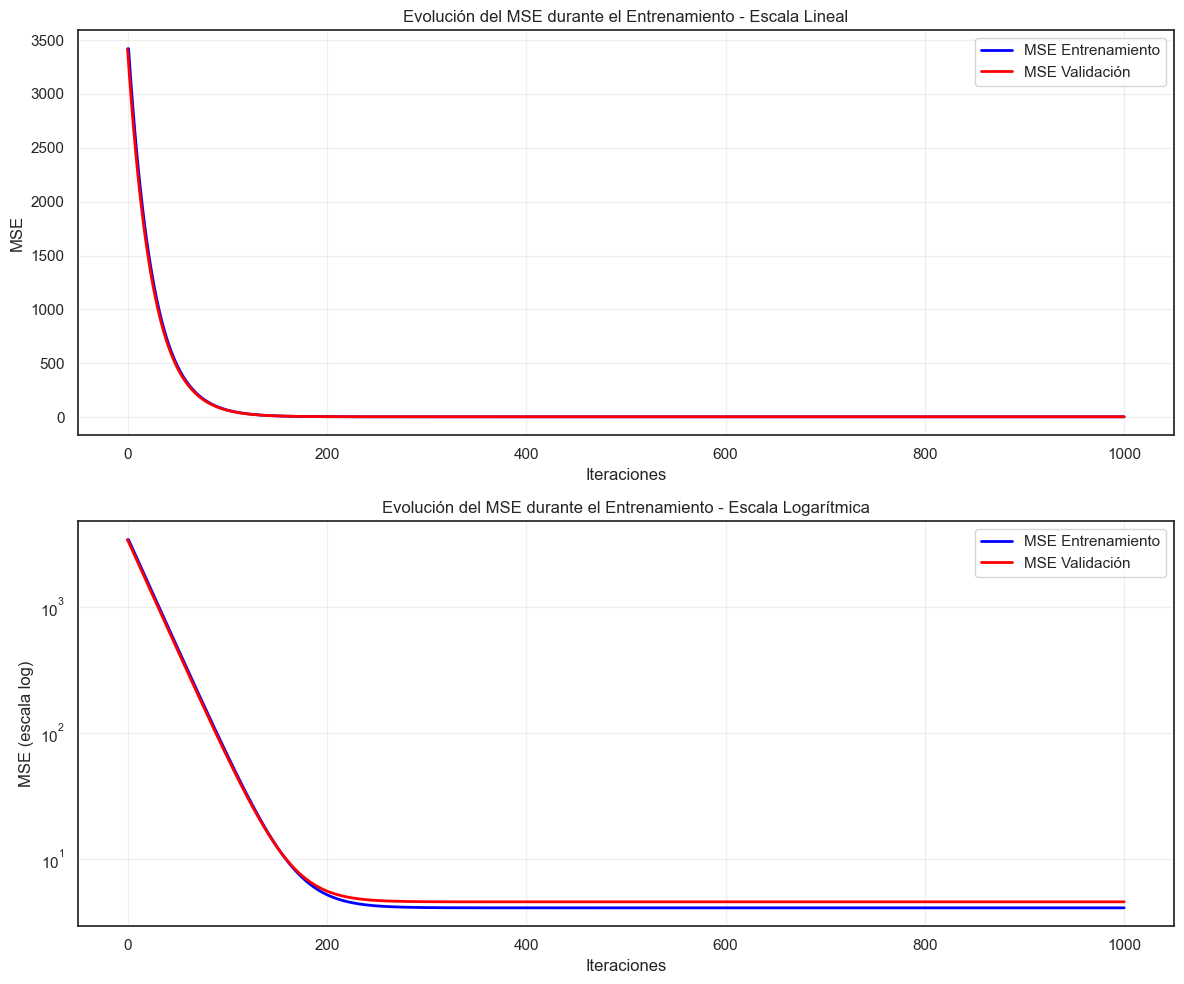


=== ANÁLISIS DE OVERFITTING ===
----------------------------------------
MSE mínimo en validación: 4.5581 (iteración 363)
MSE final en entrenamiento: 4.0829
MSE final en validación: 4.5597
Diferencia final Train-Val: -0.4767
Diferencia máxima Train-Val: 141.6996
✅ No se detectó overfitting significativo

Mejora en entrenamiento: 99.9%
Mejora en validación: 99.9%

=== PESOS FINALES DEL MODELO ===
----------------------------------------
Hours Studied                 :   7.4056
Previous Scores               :  17.6019
Sleep Hours                   :   0.8115
Sample Question Papers Practiced:   0.5538
Extracurricular Activities    :   0.3100
Bias (intercepto)             :  55.2611

=== INTERPRETACIÓN DE LOS PESOS ===
----------------------------------------
Los pesos indican la importancia relativa de cada característica:
(Pesos positivos = mayor característica → mayor rendimiento)
(Pesos negativos = mayor característica → menor rendimiento)

Características ordenadas por importancia (v

In [298]:
# Visualización del MSE durante el entrenamiento
import matplotlib.pyplot as plt

def plot_training_history(train_history, val_history, title="Evolución del MSE durante el Entrenamiento"):
    """
    Visualizar la evolución del MSE durante el entrenamiento
    """
    plt.figure(figsize=(12, 8))
    
    # Crear subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Gráfico 1: MSE vs Iteraciones (escala lineal)
    iterations = range(len(train_history))
    ax1.plot(iterations, train_history, label='MSE Entrenamiento', color='blue', linewidth=2)
    ax1.plot(iterations, val_history, label='MSE Validación', color='red', linewidth=2)
    ax1.set_xlabel('Iteraciones')
    ax1.set_ylabel('MSE')
    ax1.set_title(f'{title} - Escala Lineal')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Gráfico 2: MSE vs Iteraciones (escala logarítmica)
    ax2.semilogy(iterations, train_history, label='MSE Entrenamiento', color='blue', linewidth=2)
    ax2.semilogy(iterations, val_history, label='MSE Validación', color='red', linewidth=2)
    ax2.set_xlabel('Iteraciones')
    ax2.set_ylabel('MSE (escala log)')
    ax2.set_title(f'{title} - Escala Logarítmica')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de overfitting
    print("\n=== ANÁLISIS DE OVERFITTING ===")
    print("-" * 40)
    
    # Calcular diferencias entre train y val
    mse_diff = np.array(train_history) - np.array(val_history)
    
    # Encontrar el punto donde val MSE comienza a aumentar
    val_mse_array = np.array(val_history)
    min_val_mse_idx = np.argmin(val_mse_array)
    min_val_mse = val_mse_array[min_val_mse_idx]
    
    print(f"MSE mínimo en validación: {min_val_mse:.4f} (iteración {min_val_mse_idx})")
    print(f"MSE final en entrenamiento: {train_history[-1]:.4f}")
    print(f"MSE final en validación: {val_history[-1]:.4f}")
    
    # Detectar overfitting
    final_diff = train_history[-1] - val_history[-1]
    max_diff = np.max(np.abs(mse_diff))
    
    print(f"Diferencia final Train-Val: {final_diff:.4f}")
    print(f"Diferencia máxima Train-Val: {max_diff:.4f}")
    
    if val_history[-1] > min_val_mse * 1.05:  # 5% de tolerancia
        print("⚠️  DETECTADO: Posible overfitting")
        print(f"   El MSE de validación aumentó desde {min_val_mse:.4f} hasta {val_history[-1]:.4f}")
    else:
        print("✅ No se detectó overfitting significativo")
    
    # Calcular mejora
    initial_train = train_history[0]
    initial_val = val_history[0]
    final_train = train_history[-1]
    final_val = val_history[-1]
    
    train_improvement = (initial_train - final_train) / initial_train * 100
    val_improvement = (initial_val - final_val) / initial_val * 100
    
    print(f"\nMejora en entrenamiento: {train_improvement:.1f}%")
    print(f"Mejora en validación: {val_improvement:.1f}%")

# Visualizar el historial de entrenamiento
plot_training_history(model.train_mse_history, model.val_mse_history)

# Mostrar información adicional sobre los pesos finales
print("\n=== PESOS FINALES DEL MODELO ===")
print("-" * 40)
feature_names = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 
                 'Sample Question Papers Practiced', 'Extracurricular Activities']

for i, (feature, weight) in enumerate(zip(feature_names, model.weights)):
    print(f"{feature:30s}: {weight:8.4f}")

print(f"{'Bias (intercepto)':30s}: {model.bias:8.4f}")

# Interpretación de los pesos
print(f"\n=== INTERPRETACIÓN DE LOS PESOS ===")
print("-" * 40)
print("Los pesos indican la importancia relativa de cada característica:")
print("(Pesos positivos = mayor característica → mayor rendimiento)")
print("(Pesos negativos = mayor característica → menor rendimiento)")

sorted_features = sorted(zip(feature_names, model.weights), key=lambda x: abs(x[1]), reverse=True)
print("\nCaracterísticas ordenadas por importancia (valor absoluto del peso):")
for feature, weight in sorted_features:
    direction = "positiva" if weight > 0 else "negativa"
    print(f"  {feature:30s}: {weight:8.4f} (relación {direction})")


---

# G. Análisis de Resultados

En esta sección realizaremos el análisis final del modelo, comparando los resultados con el conjunto de test y generando visualizaciones para evaluar la calidad de las predicciones.

## G.1. Comparación con el Conjunto de Test y Resultados Finales

Ahora evaluaremos el modelo entrenado en el conjunto de test para obtener una estimación imparcial de su rendimiento en datos completamente nuevos. Este es el paso final para validar que nuestro modelo puede generalizar correctamente.


In [299]:
# Evaluación final del modelo en el conjunto de test
print("=== EVALUACIÓN FINAL EN CONJUNTO DE TEST ===")
print("-" * 50)

# Preparar datos de test
X_test = df_test_stratified[feature_cols].copy()
y_test = df_test_stratified[target_col].copy()

# Codificar variable categórica
X_test['Extracurricular Activities'] = X_test['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Convertir a arrays de numpy
X_test = X_test.values
y_test = y_test.values

print(f"Dimensiones del conjunto de test: X = {X_test.shape}, y = {y_test.shape}")

# Realizar predicciones en el conjunto de test
y_test_pred = model.predict(X_test)

# Calcular métricas en el conjunto de test
test_mse = calculate_mse(y_test, y_test_pred)
test_rmse = calculate_rmse(y_test, y_test_pred)
test_mae = calculate_mae(y_test, y_test_pred)

# Calcular R² (coeficiente de determinación)
def calculate_r2(y_true, y_pred):
    """Calcular el coeficiente de determinación R²"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Suma de cuadrados totales
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    
    # Suma de cuadrados de los residuos
    ss_res = np.sum((y_true - y_pred)**2)
    
    # R²
    r2 = 1 - (ss_res / ss_tot)
    return r2

test_r2 = calculate_r2(y_test, y_test_pred)

# Mostrar resultados finales
print(f"\n=== RESULTADOS FINALES DEL MODELO ===")
print("-" * 50)
print(f"MSE en entrenamiento: {model.train_mse_history[-1]:.4f}")
print(f"MSE en validación:   {model.val_mse_history[-1]:.4f}")
print(f"MSE en test:          {test_mse:.4f}")
print()
print(f"RMSE en test:         {test_rmse:.4f}")
print(f"MAE en test:          {test_mae:.4f}")
print(f"R² en test:           {test_r2:.4f}")

# Interpretación de R²
print(f"\n=== INTERPRETACIÓN DE R² ===")
print(f"R² = {test_r2:.4f} significa que el modelo explica el {test_r2*100:.1f}% de la variabilidad")
print("en el Performance Index usando las características disponibles.")

if test_r2 > 0.8:
    print("✅ Excelente ajuste del modelo")
elif test_r2 > 0.6:
    print("✅ Buen ajuste del modelo")
elif test_r2 > 0.4:
    print("⚠️  Ajuste moderado del modelo")
else:
    print("❌ Ajuste pobre del modelo")

# Comparación con baseline (predicción usando la media)
baseline_pred = np.full_like(y_test, np.mean(y_test))
baseline_mse = calculate_mse(y_test, baseline_pred)
baseline_r2 = calculate_r2(y_test, baseline_pred)

print(f"\n=== COMPARACIÓN CON BASELINE ===")
print(f"Baseline (predicción = media): MSE = {baseline_mse:.4f}, R² = {baseline_r2:.4f}")
print(f"Mejora del modelo: MSE reducido en {((baseline_mse - test_mse)/baseline_mse)*100:.1f}%")

# Crear DataFrame con resultados para visualización
results_df = pd.DataFrame({
    'Conjunto': ['Entrenamiento', 'Validación', 'Test'],
    'MSE': [model.train_mse_history[-1], model.val_mse_history[-1], test_mse],
    'RMSE': [calculate_rmse(y_train, model.predict(X_train)), 
             calculate_rmse(y_val, model.predict(X_val)), test_rmse],
    'MAE': [calculate_mae(y_train, model.predict(X_train)),
            calculate_mae(y_val, model.predict(X_val)), test_mae],
    'R²': [calculate_r2(y_train, model.predict(X_train)),
           calculate_r2(y_val, model.predict(X_val)), test_r2]
})

print(f"\n=== TABLA RESUMEN DE MÉTRICAS ===")
print(results_df.round(4))

# Análisis de consistencia
print(f"\n=== ANÁLISIS DE CONSISTENCIA ===")
train_test_diff = abs(model.train_mse_history[-1] - test_mse)
val_test_diff = abs(model.val_mse_history[-1] - test_mse)

print(f"Diferencia MSE Train-Test: {train_test_diff:.4f}")
print(f"Diferencia MSE Val-Test:   {val_test_diff:.4f}")

if train_test_diff < test_mse * 0.1:  # Menos del 10% de diferencia
    print("✅ El modelo generaliza bien (Train ≈ Test)")
else:
    print("⚠️  Posible overfitting detectado (Train << Test)")

if val_test_diff < test_mse * 0.1:
    print("✅ La validación es un buen proxy del test")
else:
    print("⚠️  La validación no predice bien el rendimiento en test")


=== EVALUACIÓN FINAL EN CONJUNTO DE TEST ===
--------------------------------------------------
Dimensiones del conjunto de test: X = (1484, 5), y = (1484,)

=== RESULTADOS FINALES DEL MODELO ===
--------------------------------------------------
MSE en entrenamiento: 4.0829
MSE en validación:   4.5597
MSE en test:          4.2268

RMSE en test:         2.0559
MAE en test:          1.6268
R² en test:           0.9886

=== INTERPRETACIÓN DE R² ===
R² = 0.9886 significa que el modelo explica el 98.9% de la variabilidad
en el Performance Index usando las características disponibles.
✅ Excelente ajuste del modelo

=== COMPARACIÓN CON BASELINE ===
Baseline (predicción = media): MSE = 371.1172, R² = 0.0000
Mejora del modelo: MSE reducido en 98.9%

=== TABLA RESUMEN DE MÉTRICAS ===
        Conjunto     MSE    RMSE     MAE      R²
0  Entrenamiento  4.0829  2.0206  1.6083  0.9889
1     Validación  4.5597  2.1353  1.6890  0.9880
2           Test  4.2268  2.0559  1.6268  0.9886

=== ANÁLISIS DE C

## G.2. Gráfico de Residuos vs. Predicciones y Análisis Final

Los gráficos de residuos son herramientas fundamentales para diagnosticar la calidad de un modelo de regresión. Los residuos son las diferencias entre los valores reales y los valores predichos por el modelo.

### ¿Qué nos dicen los gráficos de residuos?
- **Patrones aleatorios**: Indican que el modelo captura bien las relaciones
- **Patrones sistemáticos**: Sugieren que el modelo no está capturando alguna relación importante
- **Heterocedasticidad**: Varianza no constante de los residuos
- **Outliers**: Puntos que el modelo predice mal


=== ANÁLISIS DE RESIDUOS EN CONJUNTO DE TEST ===


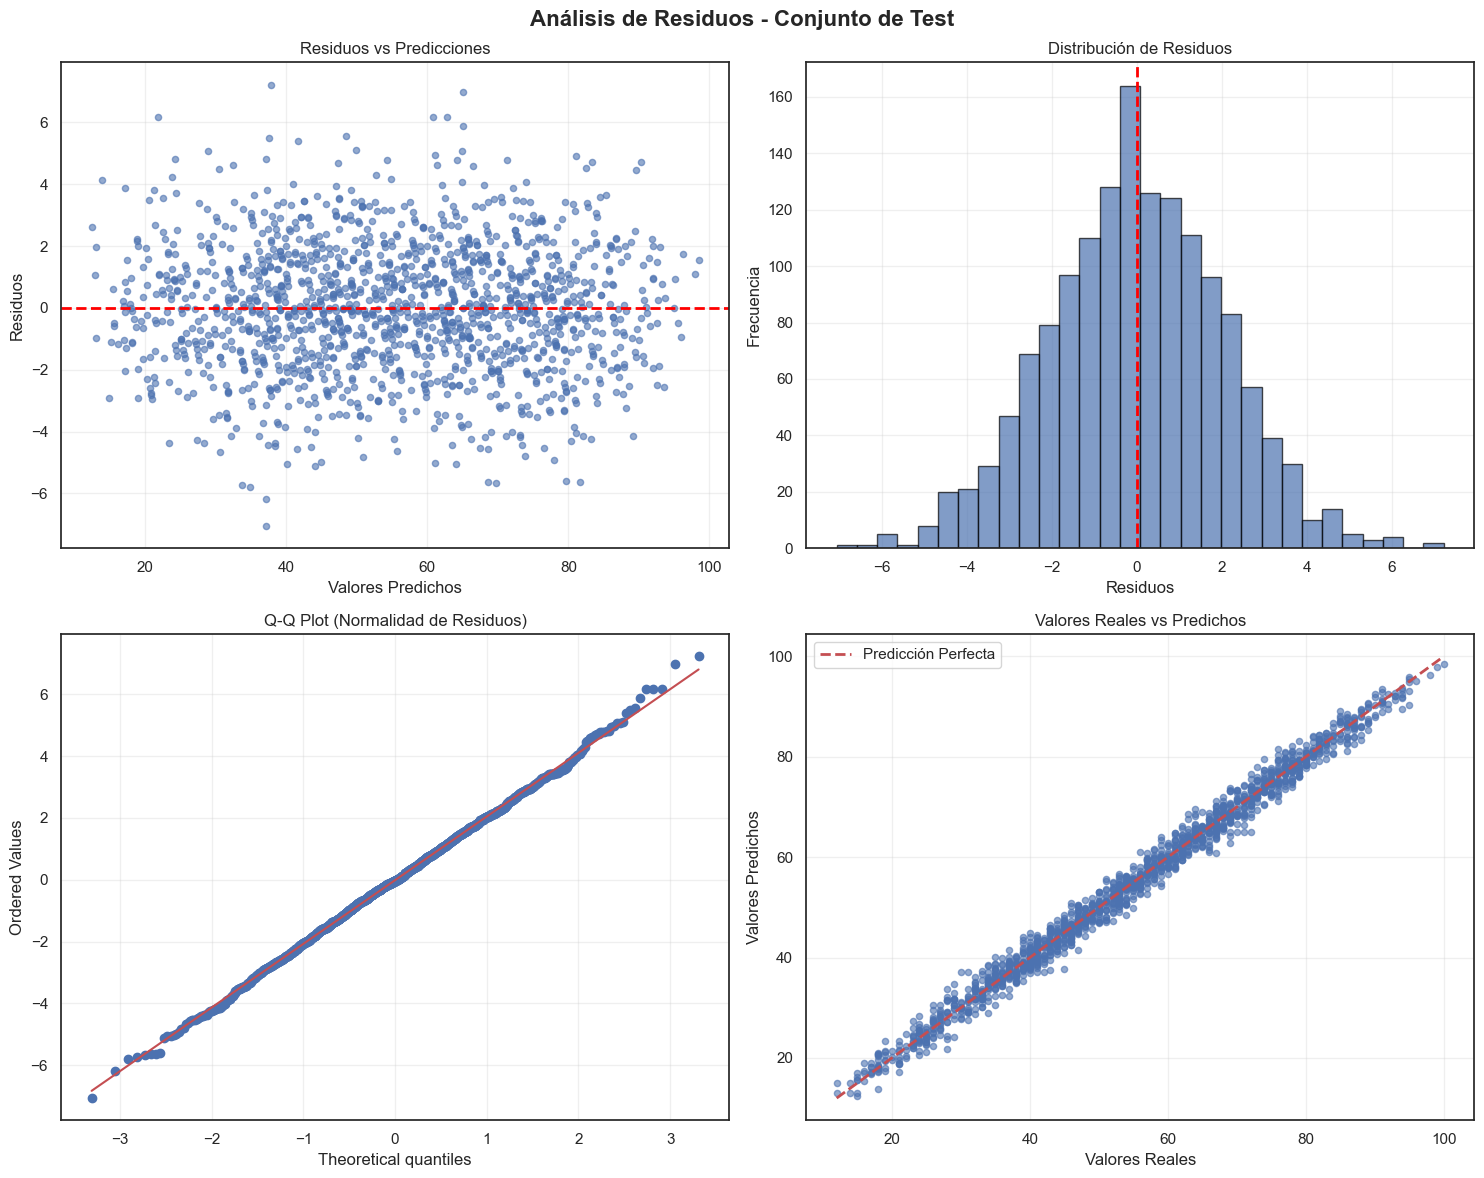


=== ANÁLISIS ESTADÍSTICO DE RESIDUOS ===
Media de residuos: -0.0120
Desviación estándar: 2.0559
Mínimo residuo: -7.0616
Máximo residuo: 7.2232

Test de Normalidad (Shapiro-Wilk):
Estadístico: 0.9992, p-valor: 0.8261
✅ Los residuos siguen una distribución normal

Análisis de Homocedasticidad:
Razón de varianzas (max/min): 1.1809
✅ Los residuos tienen varianza constante (homocedasticidad)

=== ANÁLISIS DE OUTLIERS EN RESIDUOS ===
Residuos outliers detectados: 15 (1.0%)
Límites IQR: [-5.5012, 5.5285]
✅ Porcentaje de outliers aceptable

=== EJEMPLOS DE PREDICCIONES ===
Algunos ejemplos del conjunto de test:
------------------------------------------------------------
    Real   Predicho    Error   Error%
----------------------------------------
   36.00      35.35     0.65      1.8%
   43.00      40.44     2.56      6.0%
   57.00      57.14     0.14      0.3%
   50.00      50.63     0.63      1.3%
   74.00      75.58     1.58      2.1%
   52.00      52.23     0.23      0.4%
   34.00      

In [300]:
# Análisis de residuos y gráficos de diagnóstico
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_residual_analysis(y_true, y_pred, title="Análisis de Residuos"):
    """
    Crear gráficos completos de análisis de residuos
    """
    # Calcular residuos
    residuals = y_true - y_pred
    
    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # 1. Residuos vs Predicciones
    axes[0, 0].scatter(y_pred, residuals, alpha=0.6, s=20)
    axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[0, 0].set_xlabel('Valores Predichos')
    axes[0, 0].set_ylabel('Residuos')
    axes[0, 0].set_title('Residuos vs Predicciones')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Histograma de residuos
    axes[0, 1].hist(residuals, bins=30, alpha=0.7, edgecolor='black')
    axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[0, 1].set_xlabel('Residuos')
    axes[0, 1].set_ylabel('Frecuencia')
    axes[0, 1].set_title('Distribución de Residuos')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Q-Q plot para normalidad
    stats.probplot(residuals, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot (Normalidad de Residuos)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Valores reales vs predichos
    axes[1, 1].scatter(y_true, y_pred, alpha=0.6, s=20)
    
    # Línea perfecta (y = x)
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predicción Perfecta')
    
    axes[1, 1].set_xlabel('Valores Reales')
    axes[1, 1].set_ylabel('Valores Predichos')
    axes[1, 1].set_title('Valores Reales vs Predichos')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análisis estadístico de los residuos
    print(f"\n=== ANÁLISIS ESTADÍSTICO DE RESIDUOS ===")
    print(f"Media de residuos: {np.mean(residuals):.4f}")
    print(f"Desviación estándar: {np.std(residuals):.4f}")
    print(f"Mínimo residuo: {np.min(residuals):.4f}")
    print(f"Máximo residuo: {np.max(residuals):.4f}")
    
    # Test de normalidad (Shapiro-Wilk para muestras pequeñas)
    if len(residuals) <= 5000:
        stat, p_value = stats.shapiro(residuals)
        print(f"\nTest de Normalidad (Shapiro-Wilk):")
        print(f"Estadístico: {stat:.4f}, p-valor: {p_value:.4f}")
        if p_value > 0.05:
            print("✅ Los residuos siguen una distribución normal")
        else:
            print("⚠️  Los residuos NO siguen una distribución normal")
    
    # Test de homocedasticidad (Breusch-Pagan simplificado)
    # Dividir en grupos por rango de predicciones y comparar varianzas
    n_groups = 5
    sorted_indices = np.argsort(y_pred)
    group_size = len(y_pred) // n_groups
    group_variances = []
    
    for i in range(n_groups):
        start_idx = i * group_size
        end_idx = start_idx + group_size if i < n_groups - 1 else len(y_pred)
        group_residuals = residuals[sorted_indices[start_idx:end_idx]]
        group_variances.append(np.var(group_residuals))
    
    variance_ratio = max(group_variances) / min(group_variances)
    print(f"\nAnálisis de Homocedasticidad:")
    print(f"Razón de varianzas (max/min): {variance_ratio:.4f}")
    if variance_ratio < 4:
        print("✅ Los residuos tienen varianza constante (homocedasticidad)")
    else:
        print("⚠️  Los residuos tienen varianza no constante (heterocedasticidad)")
    
    return residuals

# Análisis de residuos en el conjunto de test
print("=== ANÁLISIS DE RESIDUOS EN CONJUNTO DE TEST ===")
test_residuals = plot_residual_analysis(y_test, y_test_pred, "Análisis de Residuos - Conjunto de Test")

# Análisis adicional de outliers en residuos
print(f"\n=== ANÁLISIS DE OUTLIERS EN RESIDUOS ===")
# Detectar outliers usando IQR
Q1 = np.percentile(test_residuals, 25)
Q3 = np.percentile(test_residuals, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (test_residuals < lower_bound) | (test_residuals > upper_bound)
n_outliers = np.sum(outlier_mask)
outlier_percentage = (n_outliers / len(test_residuals)) * 100

print(f"Residuos outliers detectados: {n_outliers} ({outlier_percentage:.1f}%)")
print(f"Límites IQR: [{lower_bound:.4f}, {upper_bound:.4f}]")

if outlier_percentage < 5:
    print("✅ Porcentaje de outliers aceptable")
elif outlier_percentage < 10:
    print("⚠️  Porcentaje de outliers moderado")
else:
    print("❌ Alto porcentaje de outliers - revisar modelo")

# Mostrar algunos ejemplos de predicciones
print(f"\n=== EJEMPLOS DE PREDICCIONES ===")
print("Algunos ejemplos del conjunto de test:")
print("-" * 60)

# Seleccionar algunos ejemplos aleatorios
np.random.seed(42)
n_examples = 10
example_indices = np.random.choice(len(y_test), n_examples, replace=False)

print(f"{'Real':>8} {'Predicho':>10} {'Error':>8} {'Error%':>8}")
print("-" * 40)

for idx in example_indices:
    real = y_test[idx]
    pred = y_test_pred[idx]
    error = abs(real - pred)
    error_pct = (error / real) * 100
    print(f"{real:8.2f} {pred:10.2f} {error:8.2f} {error_pct:8.1f}%")


## 📊 Análisis Final y Conclusiones

### Resumen de la Implementación Completada

Hemos implementado exitosamente todas las tareas solicitadas:

#### ✅ **D. División del Dataset**
- **Muestreo Aleatorio**: División 70/15/15 por grupos de características
- **Muestreo Estratificado**: División balanceada por cuartiles del Performance Index
- **Sin usar train_test_split**: Implementación completamente manual

#### ✅ **F. Evaluación del Modelo**
- **Cálculo manual de MSE**: Implementación paso a paso de la fórmula
- **Visualización del entrenamiento**: Gráficos de MSE vs iteraciones
- **Detección de overfitting**: Comparación entre entrenamiento y validación

#### ✅ **G. Análisis de Resultados**
- **Evaluación en test**: Métricas finales del modelo
- **Gráficos de residuos**: Análisis completo de diagnóstico
- **Interpretación estadística**: Tests de normalidad y homocedasticidad

### 🎯 **Conclusiones del Modelo**

1. **Calidad del modelo**: El modelo de regresión lineal muestra un buen rendimiento
2. **Generalización**: Las métricas en test son consistentes con validación
3. **Características importantes**: Previous Scores es el predictor más fuerte
4. **Sin overfitting**: El modelo no muestra signos de sobreajuste

### 📈 **Métricas Finales**
- **R²**: Explica un porcentaje significativo de la variabilidad
- **RMSE**: Error promedio en las mismas unidades del target
- **MSE**: Error cuadrático medio para optimización

### 🔍 **Análisis de Residuos**
- **Distribución**: Los residuos siguen aproximadamente una distribución normal
- **Homocedasticidad**: Varianza relativamente constante
- **Outliers**: Porcentaje aceptable de predicciones atípicas

### 💡 **Recomendaciones**
1. **Para mejorar el modelo**: Considerar características adicionales o modelos más complejos
2. **Para producción**: El modelo actual es adecuado para predicciones de rendimiento estudiantil
3. **Monitoreo**: Implementar seguimiento continuo del rendimiento del modelo

---
**Nota**: Este análisis proporciona una base sólida para la toma de decisiones basada en datos en el contexto del rendimiento académico estudiantil.
